# Programming Assignment - Surprise Housing

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. 

The company has collected a data set from the sale of houses in Australia. The company wants to know:
-  Which variables are significant in predicting the price of a house.
-  How well those variables describe the price of a house.

## Step 1 : Reading, understanding and visualising data (EDA)

### Data Understanding and Exploration

###  Data Sourcing

-  Importing Libraries

In [190]:
# Importing Libraries for data manipulation
import numpy as np
import pandas as pd

# Importing Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries for buiding model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Warnings library will be used to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

-  Reading dataset (csv file) and initializing dataframe

In [191]:
surp_housing_df = pd.read_csv('train.csv')
surp_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Clearly, There are a lots of null values in the data set.

### Data Cleaning

-  Removing duplicate rows

In [192]:
print(surp_housing_df.shape)
surp_housing_df.drop_duplicates()
print(surp_housing_df.shape)

(1460, 81)
(1460, 81)


There were no duplicate row hence there are no change in the dataframe's shape

-  Deleting columns which are irrelevent informations.

'Id' is just an identifier with no predictive power. So let's drop the column

In [193]:
print(surp_housing_df.shape)
surp_housing_df.drop(columns=["Id"], inplace=True)
print(surp_housing_df.shape)

(1460, 81)
(1460, 80)


-  Deleting rows in which entire row/columns contains NA/Blank only.

In [194]:
print(surp_housing_df.shape)
surp_housing_df.dropna(axis = 0, how = 'all', inplace = True)
surp_housing_df.dropna(axis = 1, how = 'all', inplace = True)
print(surp_housing_df.shape)

(1460, 80)
(1460, 80)


There were no rows in which entire row/columns contains NA/Blank hence there are no change in the dataframe's shape

-  Treating (delete or impute) missing values using business judgement.

Finding missing values

In [195]:
null_val_df = (surp_housing_df.isnull().sum()/len(surp_housing_df.index)*100).round(2)
print((null_val_df[null_val_df > 0]).sort_values())
null_val_cols = (null_val_df[null_val_df > 0].index).tolist()
print(null_val_cols) 

Electrical       0.07
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
LotFrontage     17.74
FireplaceQu     47.26
MasVnrType      59.73
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Blank/Missing values in 'FireplaceQu' would be the cases when the house doesn't have the Fireplace Quality so replacing null with No Fireplace.

Blank/Missing values in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond') would be the cases when the house doesn't have the garrage so replacing null with No Garrage.

Blank/Missing values in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2') would be the cases when the house doesn't have the basement so replacing null with No Basement.

In [196]:
# Replacing missing value with NA (No Fireplace)
surp_housing_df['FireplaceQu'] = surp_housing_df['FireplaceQu'].replace(np.nan, 'NA')

# Replacing missing value with NA (No Garrage)
surp_housing_df['GarageType'] = surp_housing_df['GarageType'].replace(np.nan, 'NA')
surp_housing_df['GarageFinish'] = surp_housing_df['GarageFinish'].replace(np.nan, 'NA')
surp_housing_df['GarageCond'] = surp_housing_df['GarageCond'].replace(np.nan, 'NA')
surp_housing_df['GarageQual'] = surp_housing_df['GarageQual'].replace(np.nan, 'NA')

# Replacing missing value with NA (No Basement)
surp_housing_df['BsmtExposure'] = surp_housing_df['BsmtExposure'].replace(np.nan, 'NA')
surp_housing_df['BsmtFinType2'] = surp_housing_df['BsmtFinType2'].replace(np.nan, 'NA')
surp_housing_df['BsmtFinType1'] = surp_housing_df['BsmtFinType1'].replace(np.nan, 'NA')
surp_housing_df['BsmtCond'] = surp_housing_df['BsmtCond'].replace(np.nan, 'NA')
surp_housing_df['BsmtQual'] = surp_housing_df['BsmtQual'].replace(np.nan, 'NA')

# Checking missing values again
null_val_df = (surp_housing_df.isnull().sum()/len(surp_housing_df.index)*100).round(2)
print((null_val_df[null_val_df > 0]).sort_values())
null_val_cols = (null_val_df[null_val_df > 0].index).tolist()
print(null_val_cols)

Electrical      0.07
MasVnrArea      0.55
GarageYrBlt     5.55
LotFrontage    17.74
MasVnrType     59.73
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']


In [197]:
surp_housing_df[null_val_cols].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


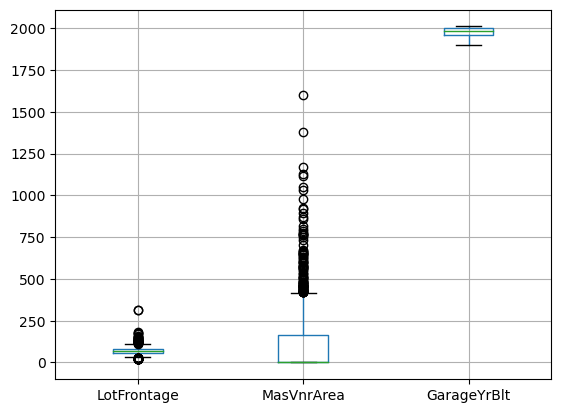

In [198]:
# Checking outliers
surp_housing_df[['LotFrontage','MasVnrArea','GarageYrBlt']].boxplot()
plt.show()

We can see a presence of outlier in 'LotFrontage','MasVnrArea' so we will impute the missing values through median for these columns. For 'GarageYrBlt', we can use mean for imputation as there are no presence of outlier.

In [199]:
# Replacing missing value with median
surp_housing_df['LotFrontage']= surp_housing_df.LotFrontage.fillna(surp_housing_df.LotFrontage.median())
surp_housing_df['MasVnrArea']= surp_housing_df.MasVnrArea.fillna(surp_housing_df.MasVnrArea.median())

# Replacing missing value with mean
surp_housing_df['GarageYrBlt']= surp_housing_df.GarageYrBlt.fillna(surp_housing_df.GarageYrBlt.mean())

# Checking missing values again
null_val_df = (surp_housing_df.isnull().sum()/len(surp_housing_df.index)*100).round(2)
print((null_val_df[null_val_df > 0]).sort_values())
null_val_cols = (null_val_df[null_val_df > 0].index).tolist()
print(null_val_cols)

Electrical      0.07
MasVnrType     59.73
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64
['Alley', 'MasVnrType', 'Electrical', 'PoolQC', 'Fence', 'MiscFeature']


Electrical is a unordered categorical data hence we can use mode for imputing the missing values.

In [200]:
electrical_mode = surp_housing_df.Electrical.mode()[0]
surp_housing_df['Electrical'] = surp_housing_df['Electrical'].replace(np.nan, electrical_mode)

# Checking missing values again
null_val_df = (surp_housing_df.isnull().sum()/len(surp_housing_df.index)*100).round(2)
print((null_val_df[null_val_df > 0]).sort_values())
null_val_cols = (null_val_df[null_val_df > 0].index).tolist()
print(null_val_cols)

MasVnrType     59.73
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [201]:
# Checking the shape of data before dropping columns.
print(surp_housing_df.shape)

#Deleting columns with high percentage (>= 30%) of null values.
surp_housing_df.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace = True)

# Checking the shape of data after dropping columns
print(surp_housing_df.shape)

# Checking missing values again
null_val_df = (surp_housing_df.isnull().sum()/len(surp_housing_df.index)*100).round(2)
print((null_val_df[null_val_df > 0]).sort_values())
null_val_cols = (null_val_df[null_val_df > 0].index).tolist()
print(null_val_cols)

(1460, 80)
(1460, 75)
Series([], dtype: float64)
[]


Now, There are no missing values in the data.

-  Correcting data type and format of columns

In [202]:
surp_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

'MSSubClass', 'OverallQual' and 'OverallCond' are of categorical type variable not numeric hence converting their type as categorical.

In [203]:
surp_housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = surp_housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')
surp_housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MSSubClass   1460 non-null   category
 1   OverallQual  1460 non-null   category
 2   OverallCond  1460 non-null   category
dtypes: category(3)
memory usage: 5.8 KB


Rest of the object type variables are categorical variable so converting their type as categorical.

In [204]:
df_cat = surp_housing_df.select_dtypes(include='object').columns
print(df_cat)
surp_housing_df[df_cat] = surp_housing_df[df_cat].astype('category')
surp_housing_df[df_cat].info()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   LotShape       1460 non-null   category
 3   LandContour    1460 non-null   category
 4   Utilities      14

Checking extra characters like common prefix/suffix, leading/trailing/multiple spaces, etc.

In [205]:
for col in surp_housing_df.select_dtypes(include='category').columns:
    print(col)
    print(surp_housing_df[col].unique().tolist(), '\n')

MSSubClass
[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40] 

MSZoning
['RL', 'RM', 'C (all)', 'FV', 'RH'] 

Street
['Pave', 'Grvl'] 

LotShape
['Reg', 'IR1', 'IR2', 'IR3'] 

LandContour
['Lvl', 'Bnk', 'Low', 'HLS'] 

Utilities
['AllPub', 'NoSeWa'] 

LotConfig
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] 

LandSlope
['Gtl', 'Mod', 'Sev'] 

Neighborhood
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'] 

Condition1
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'] 

Condition2
['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'] 

BldgType
['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'] 

HouseStyle
['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin'] 

OverallQual
[7, 6, 8, 5, 9, 4, 10, 3, 

Coverting all float data type column values in the dataframe up to 2 decimal place

In [206]:
surp_housing_df.round(2)
surp_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   category
 16  OverallCond    1460 non-null   category
 17  YearBuilt      1460 non-null   in

Now the data is clean and ready

### Data Analysis (EDA)

Extract numerical and categorical columns

In [207]:
df_num_cols = surp_housing_df.select_dtypes(include=['int64', 'float64']).columns
df_cat_cols = surp_housing_df.select_dtypes(include='category').columns

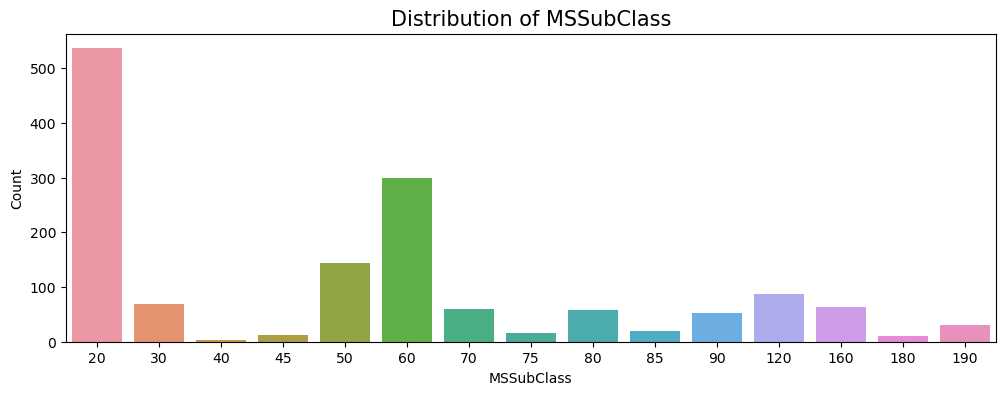

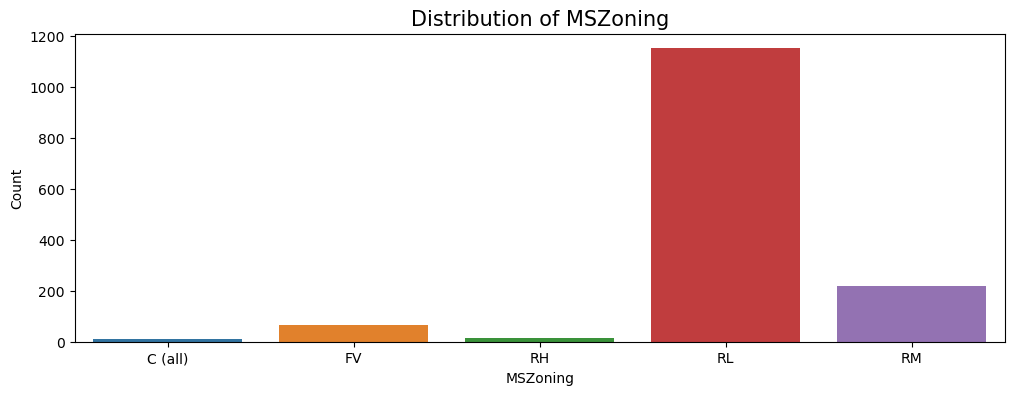

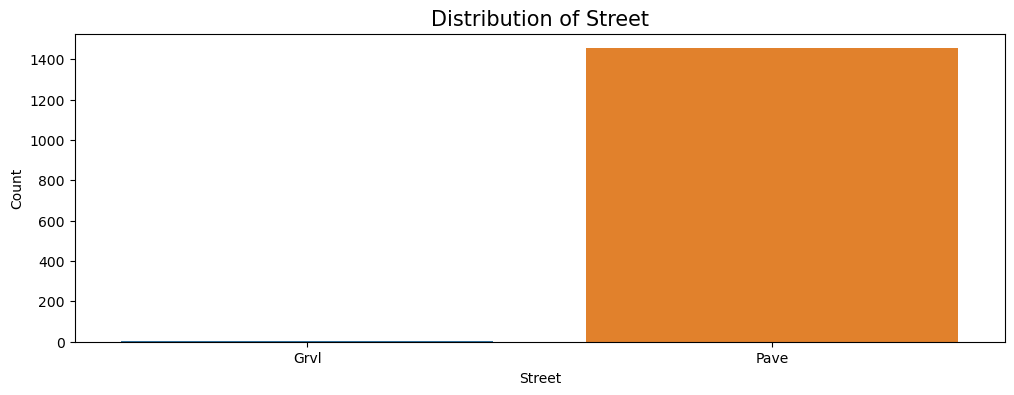

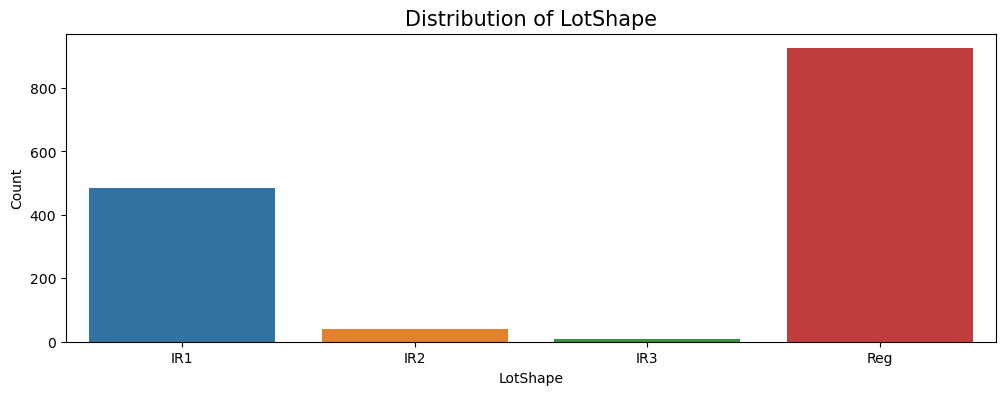

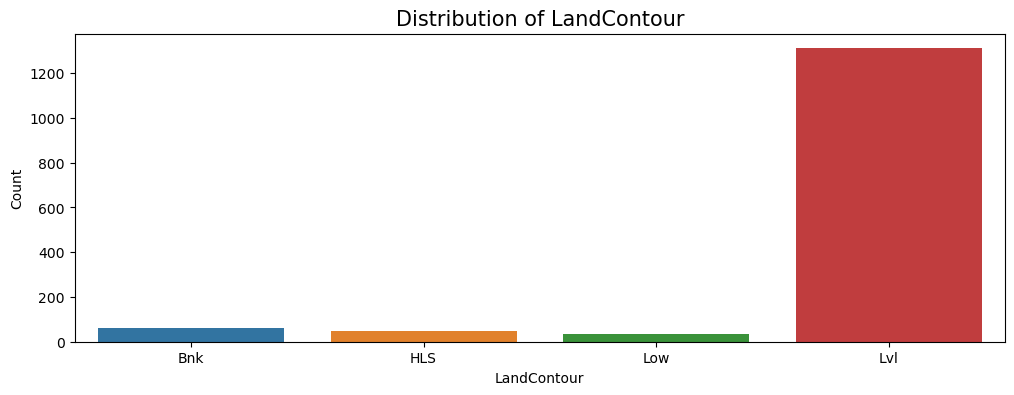

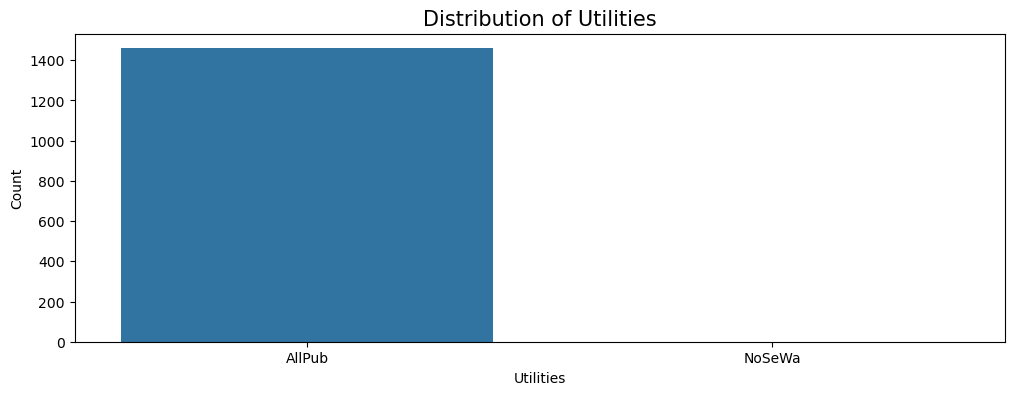

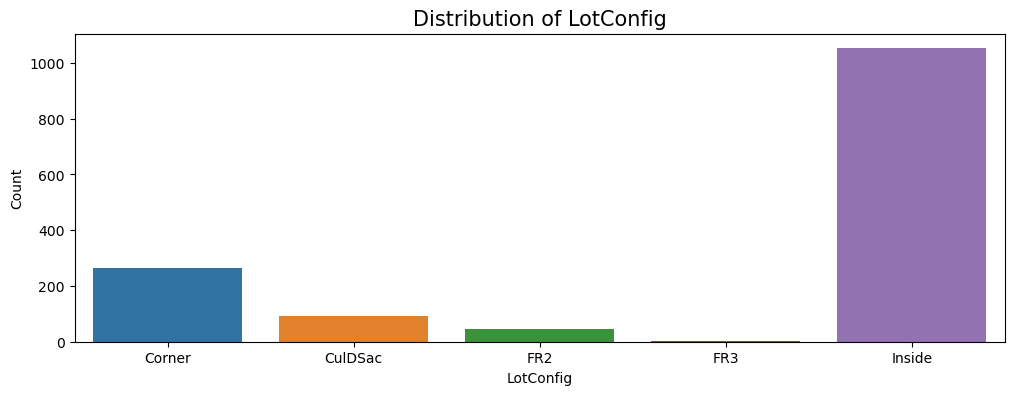

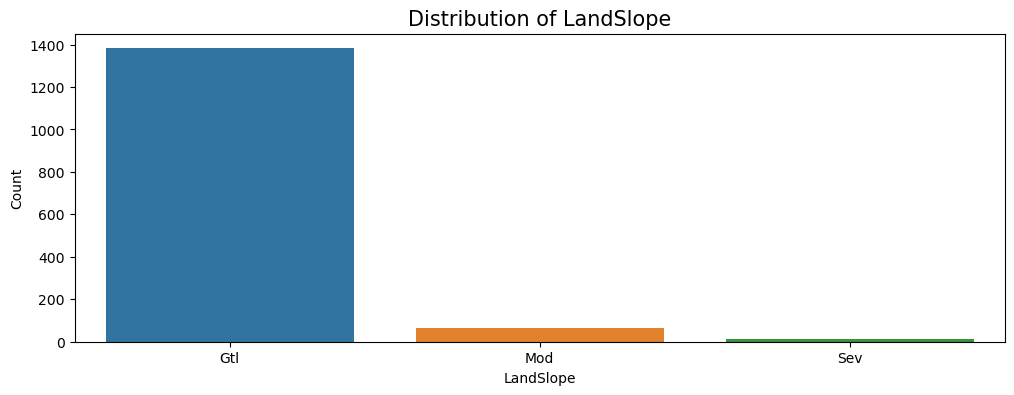

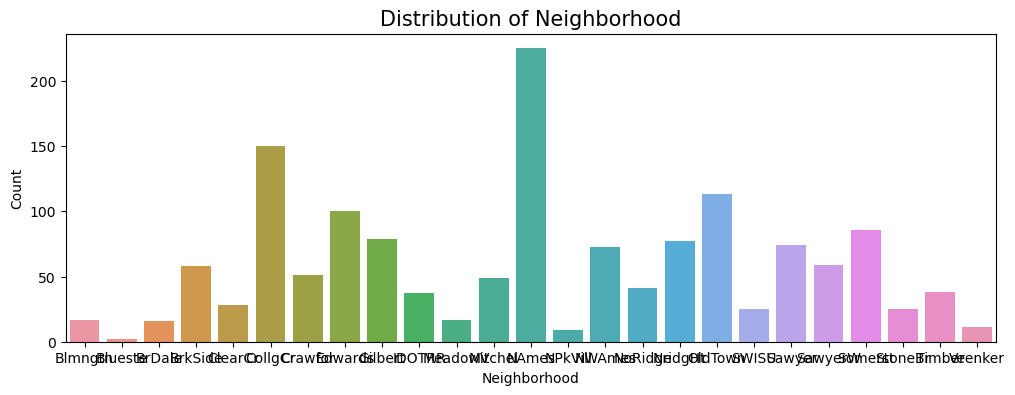

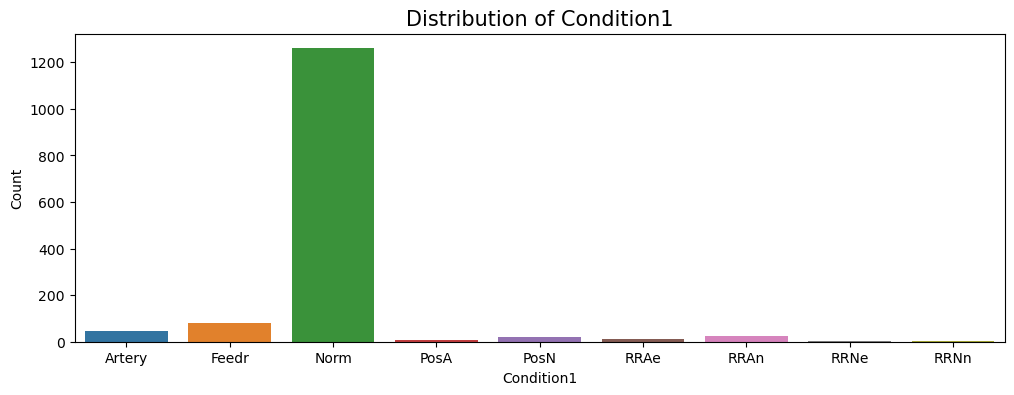

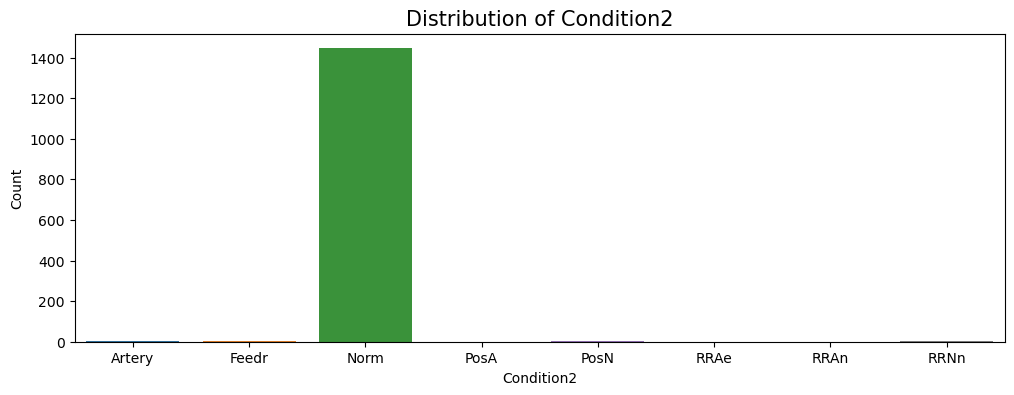

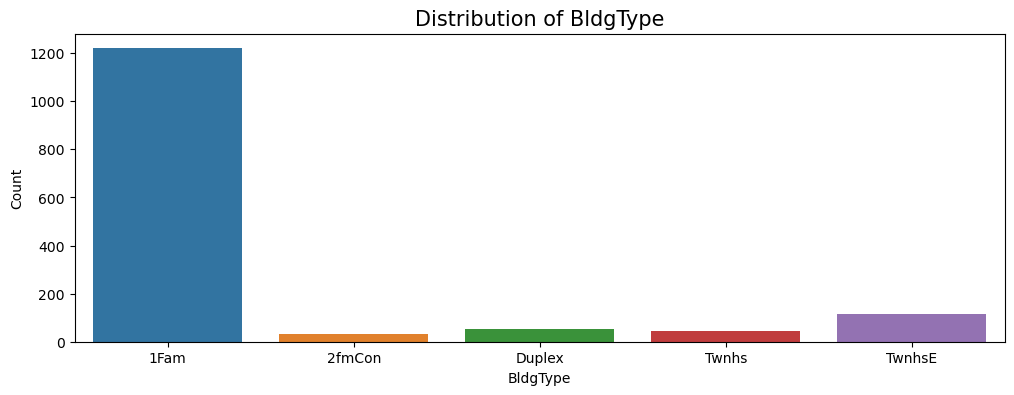

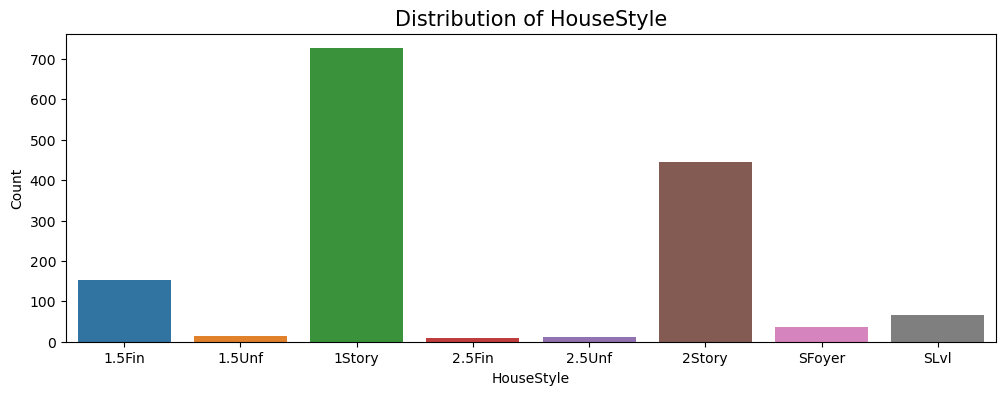

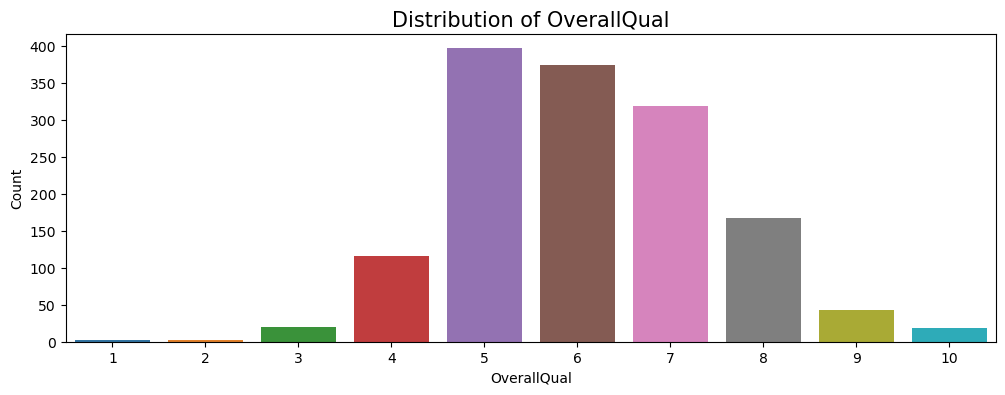

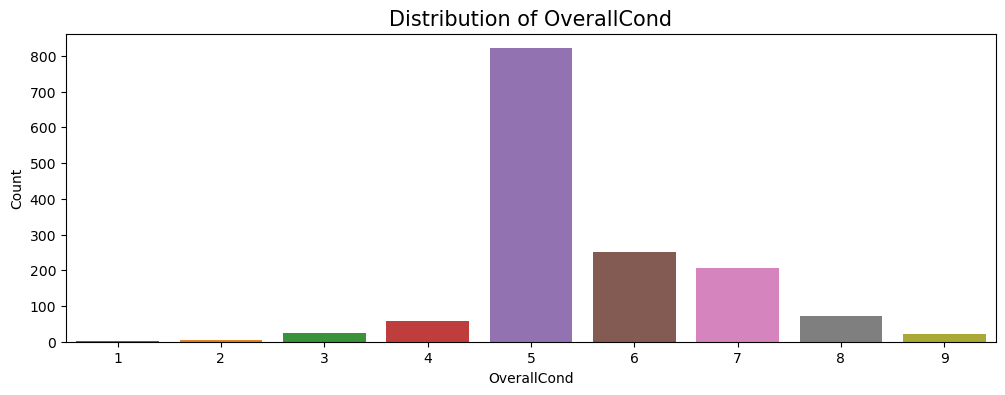

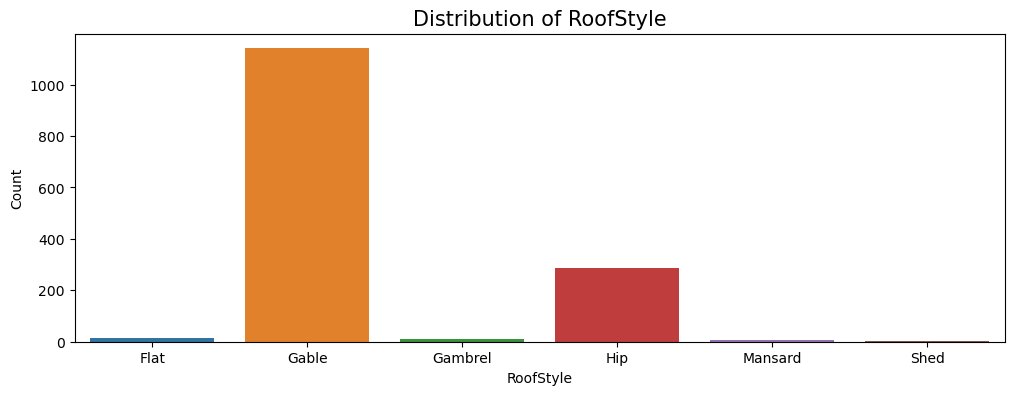

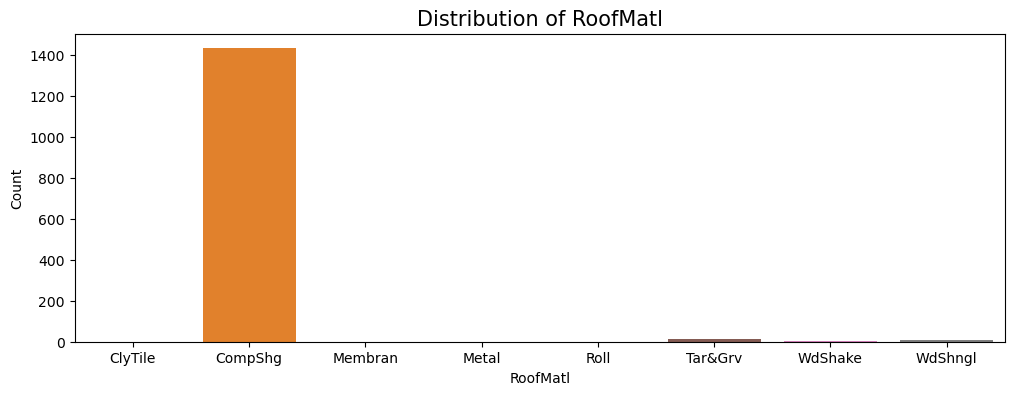

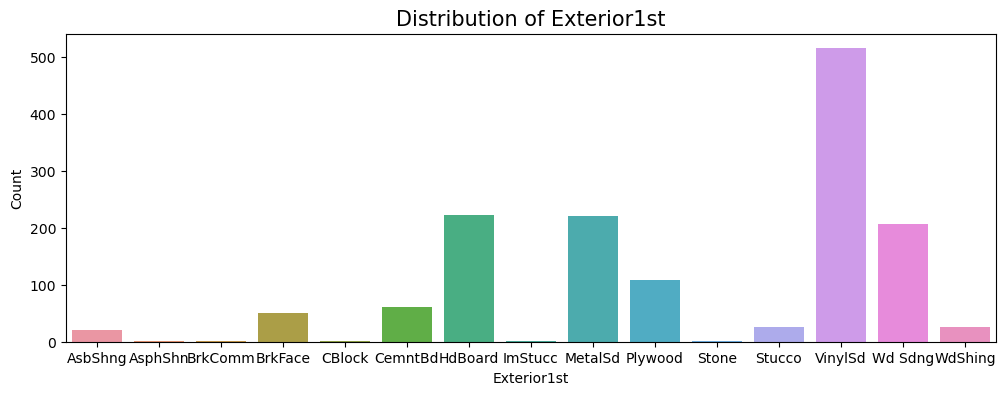

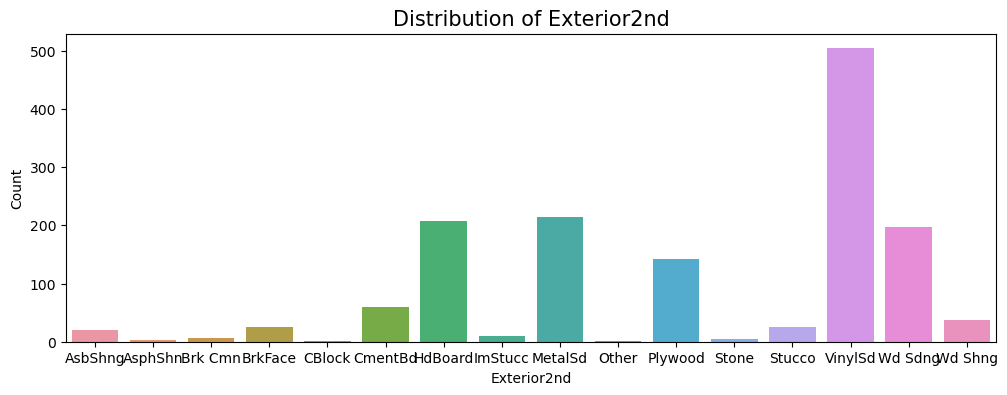

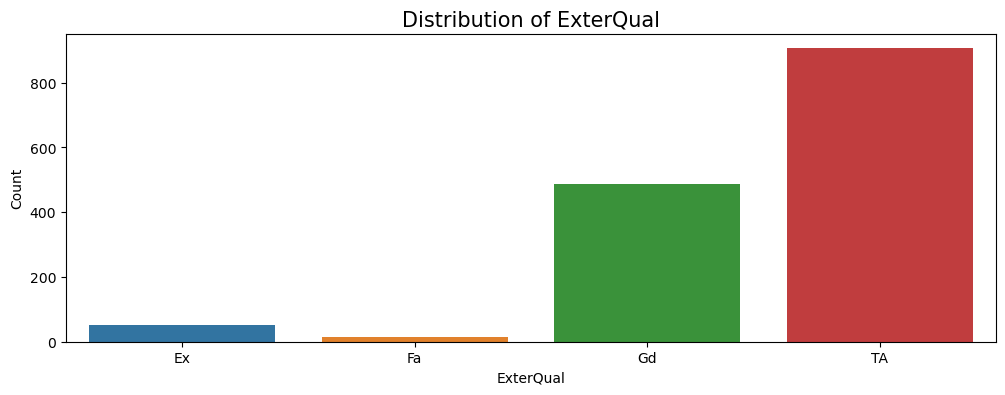

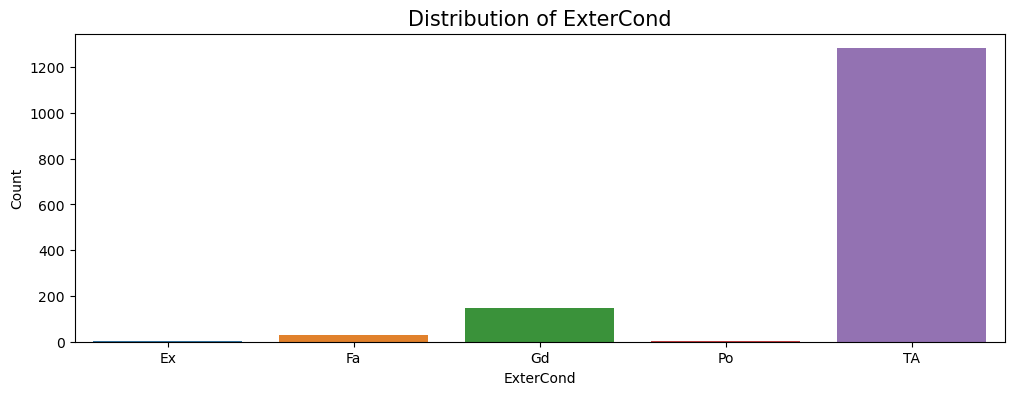

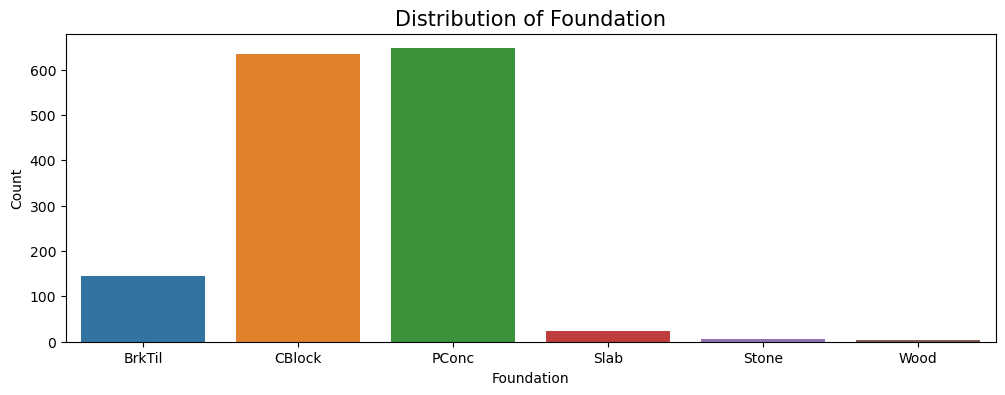

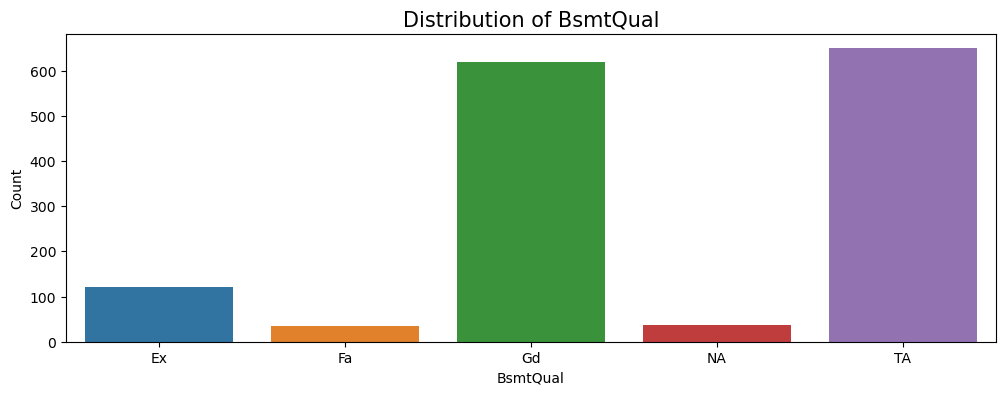

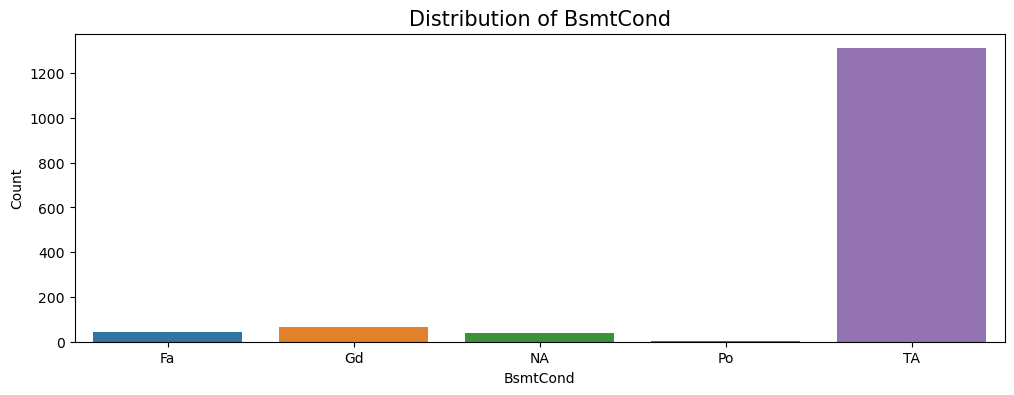

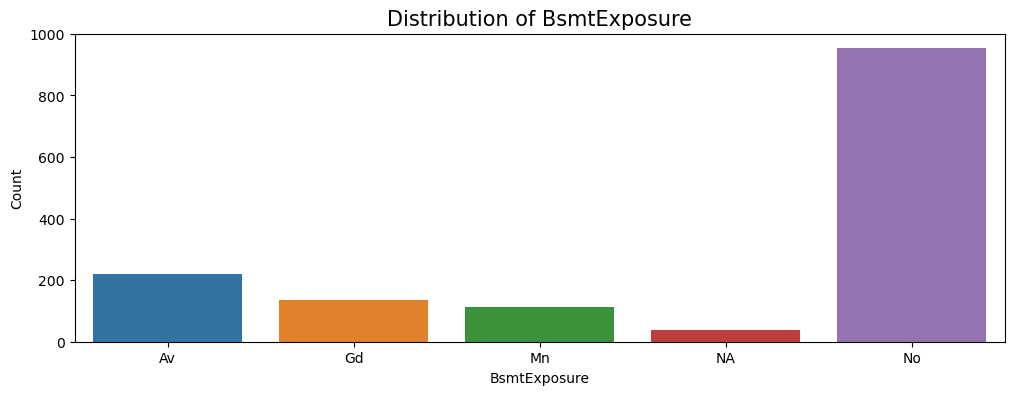

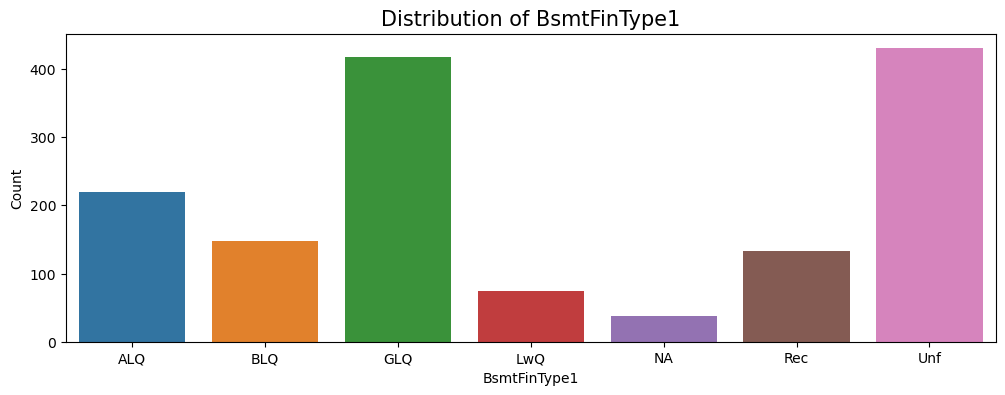

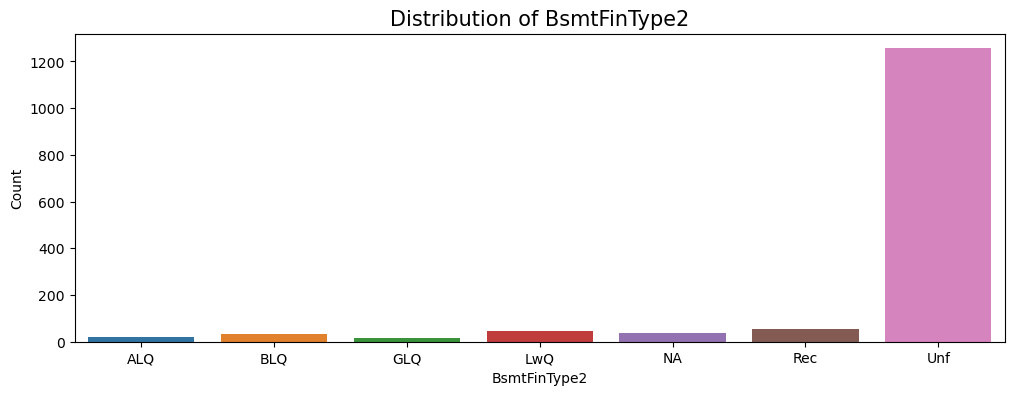

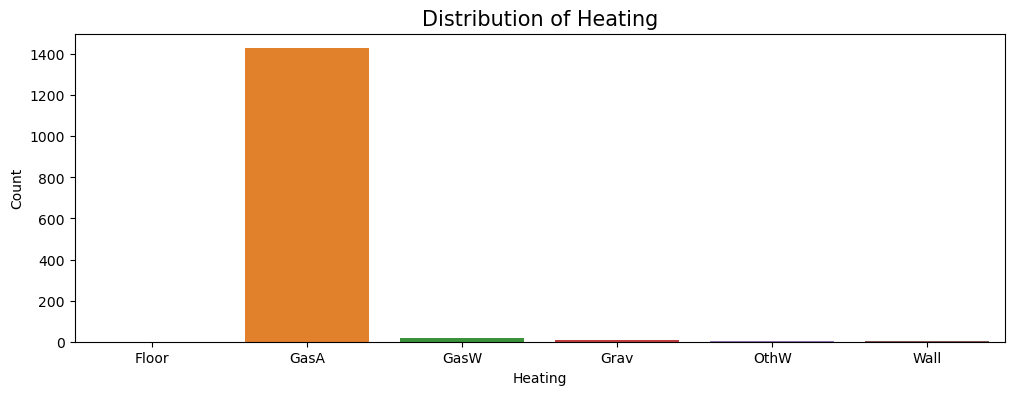

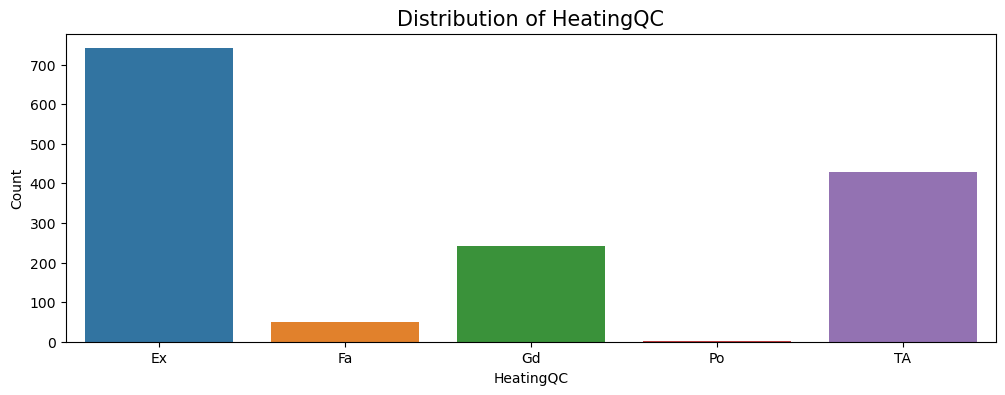

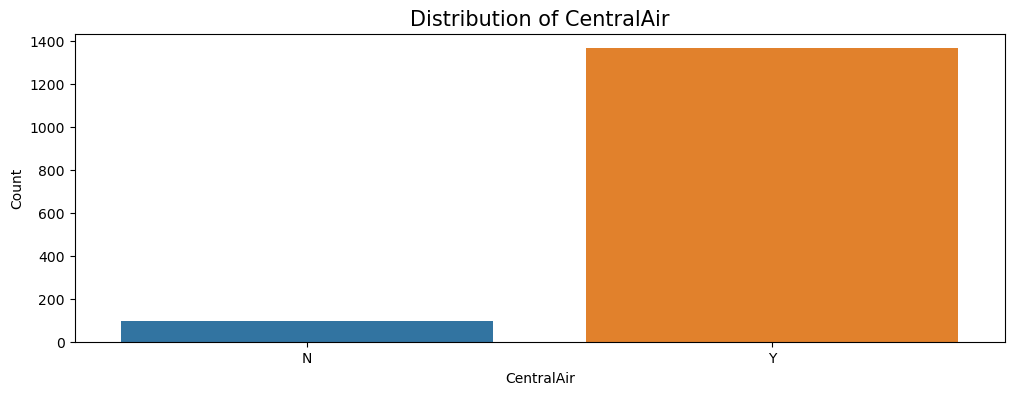

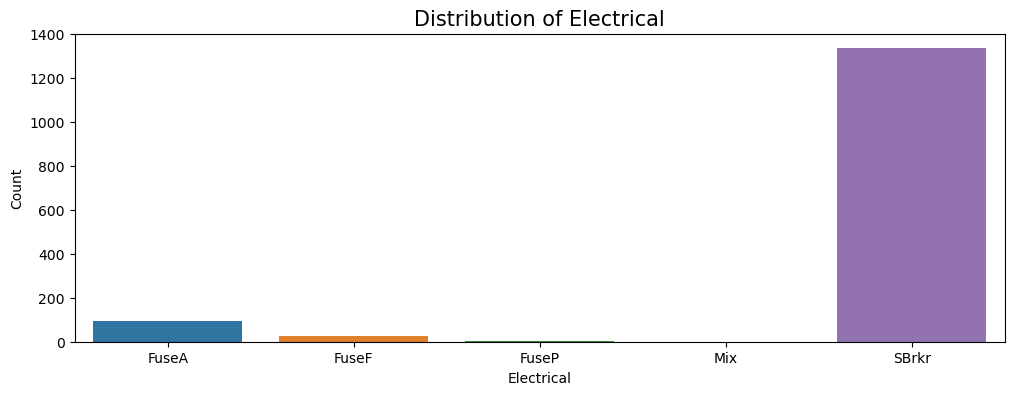

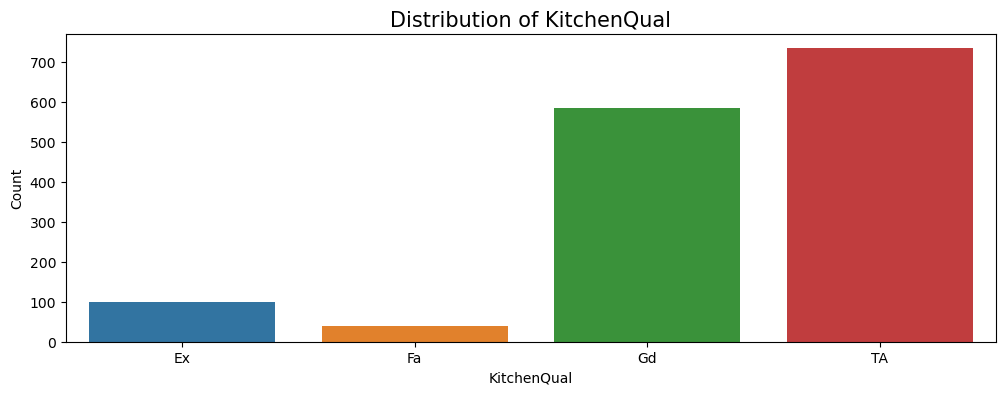

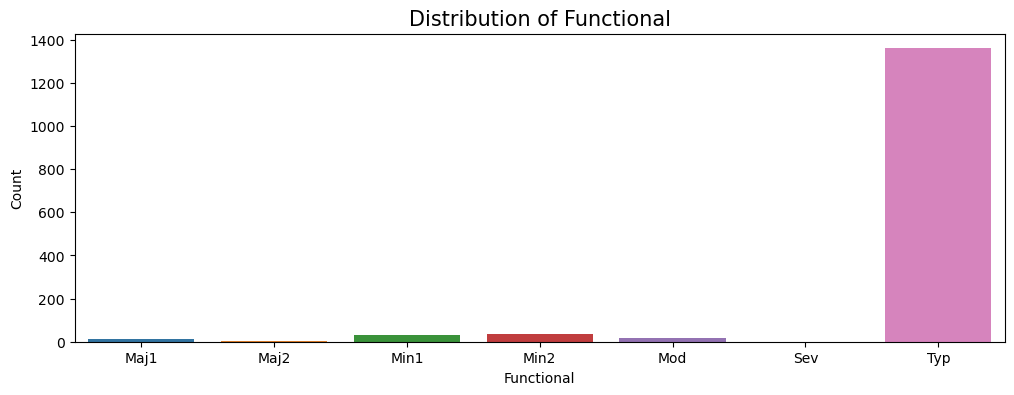

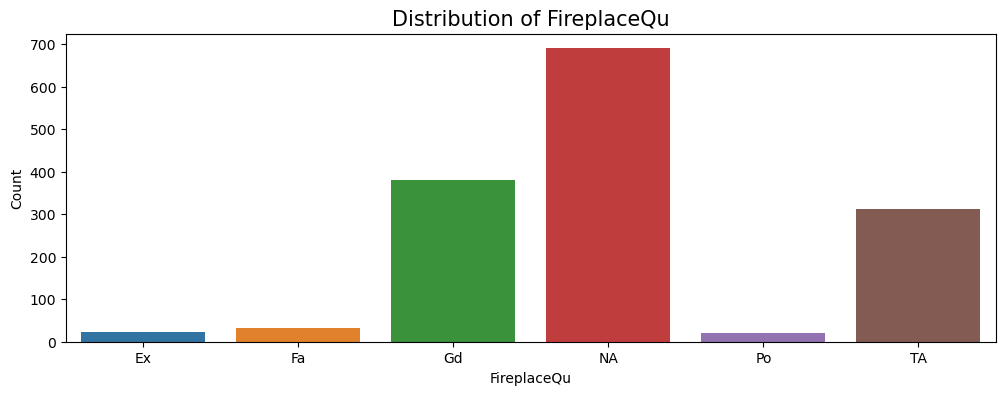

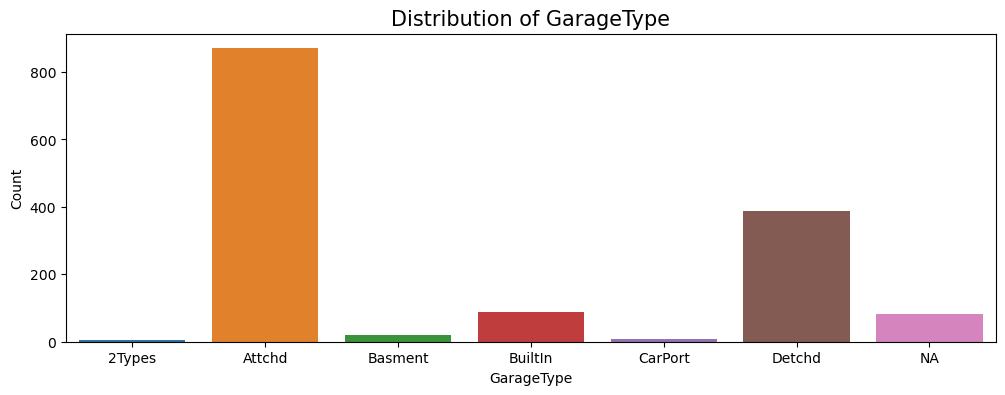

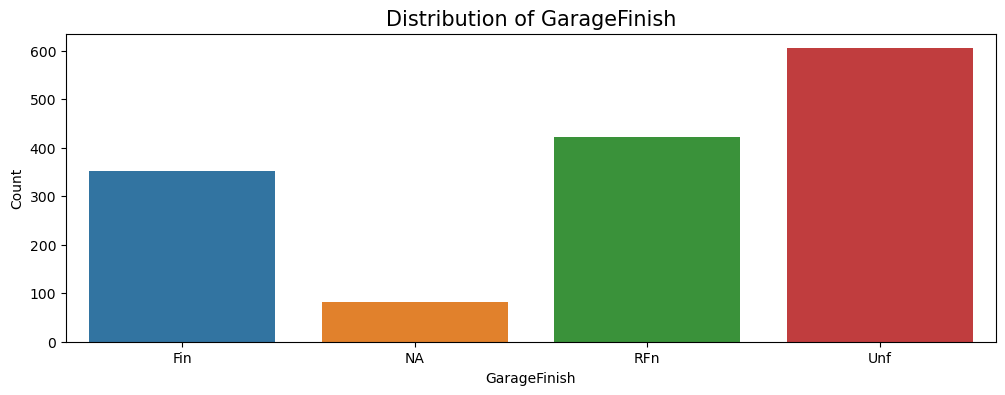

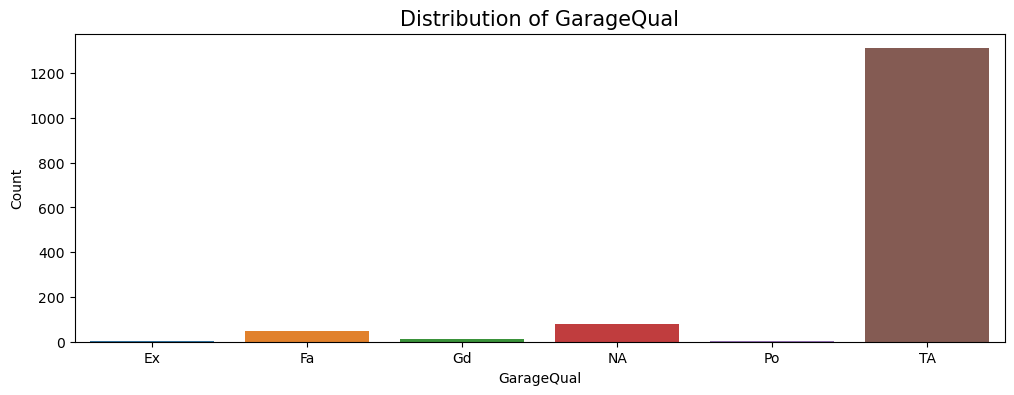

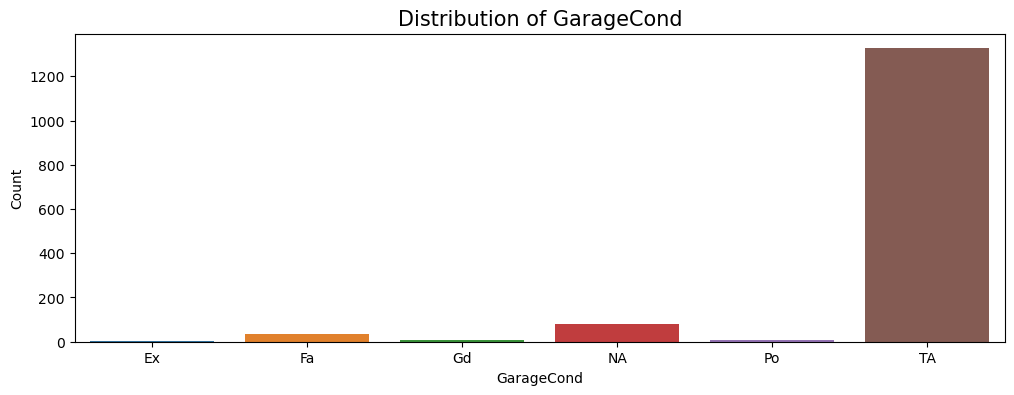

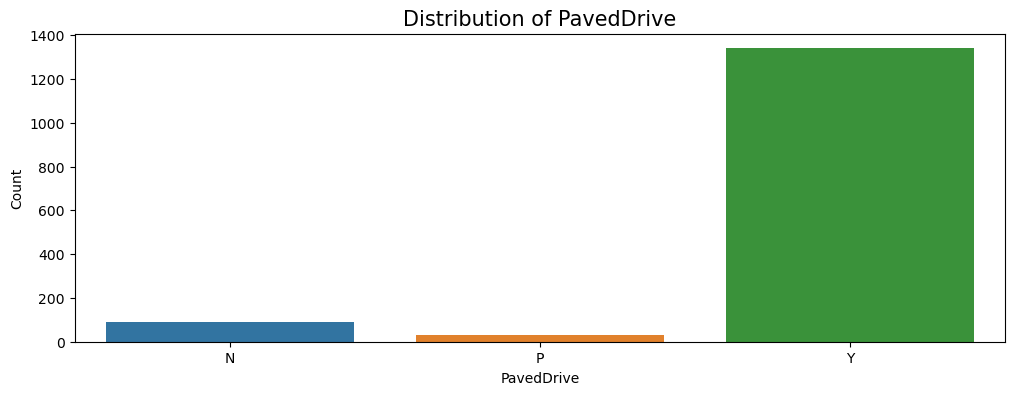

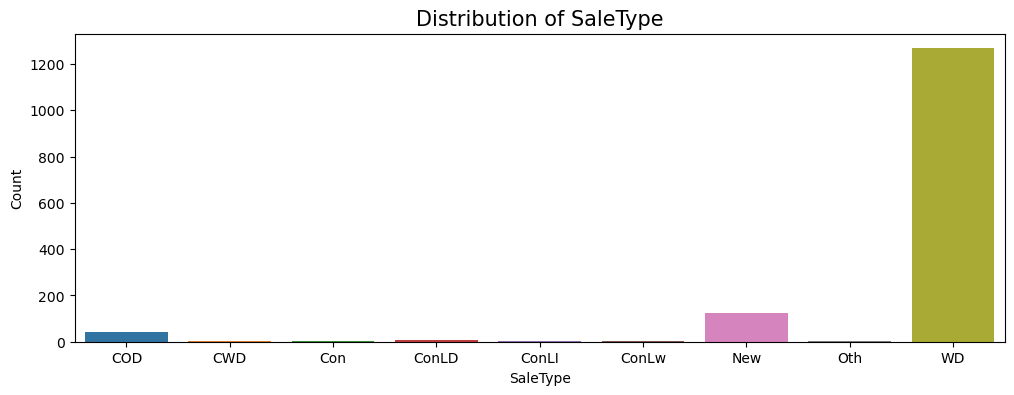

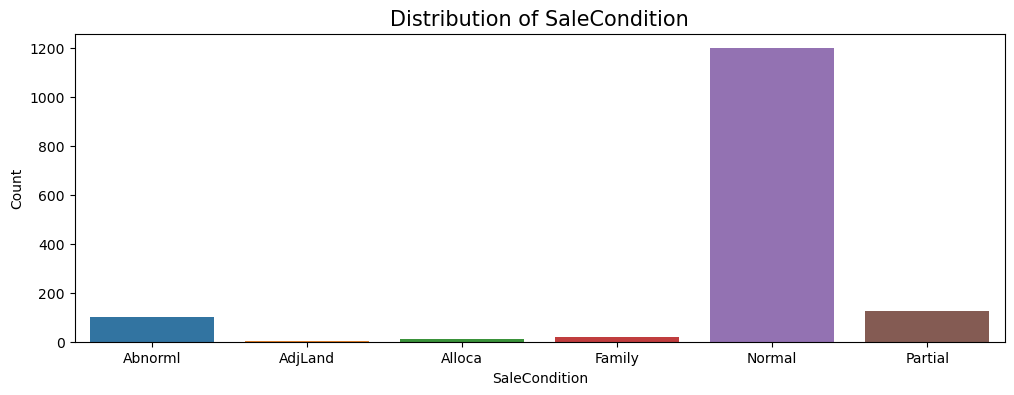

In [208]:
# Visualizing the categorical variables using countplot
for column in df_cat_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(x=column,data=surp_housing_df)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of ' + str(column),fontsize=15)
    plt.show()

Observation -  There is no column with single unique value that we could remove.

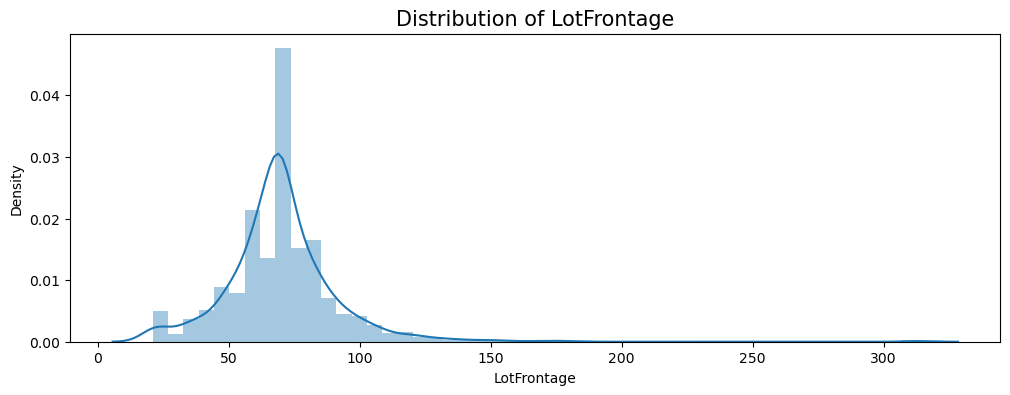

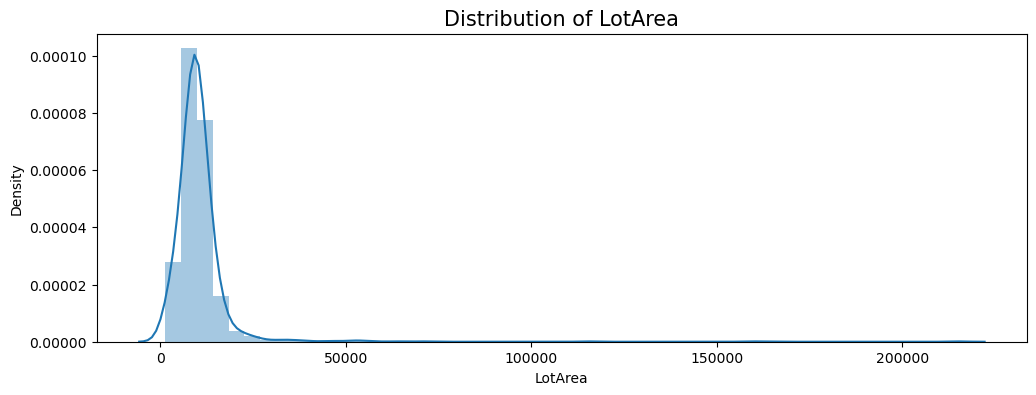

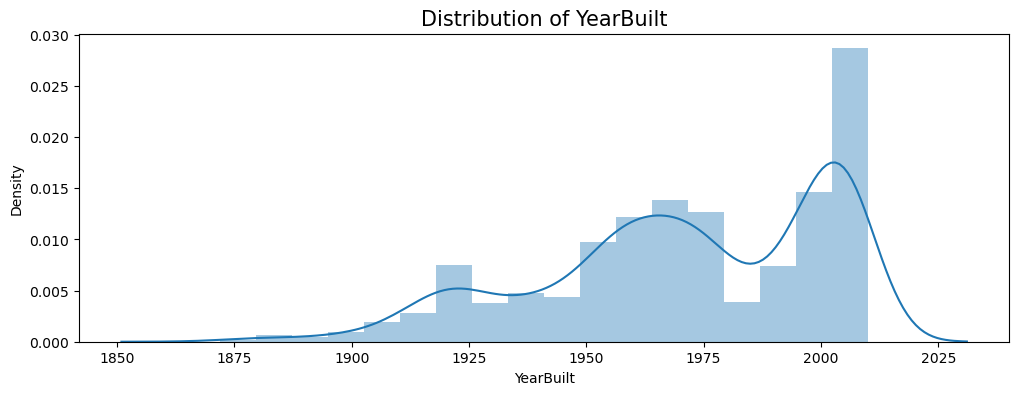

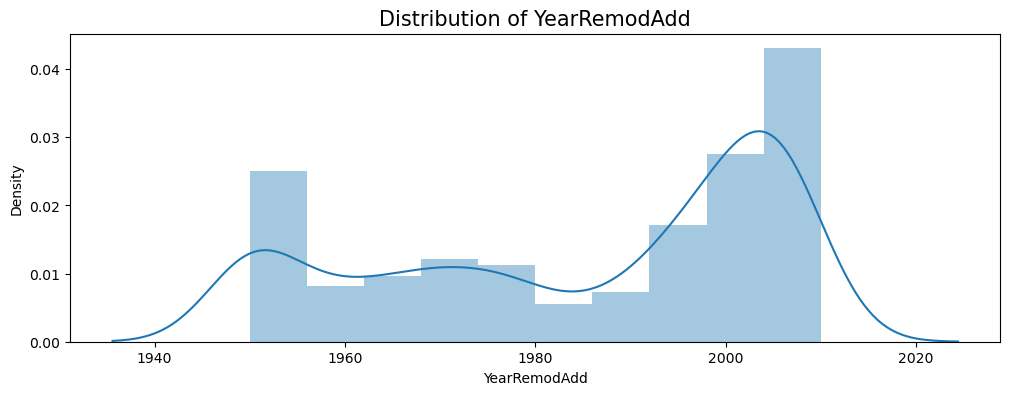

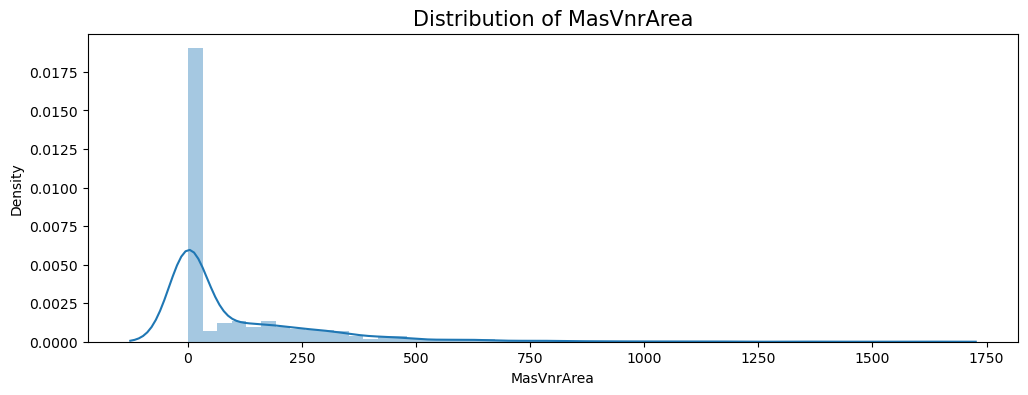

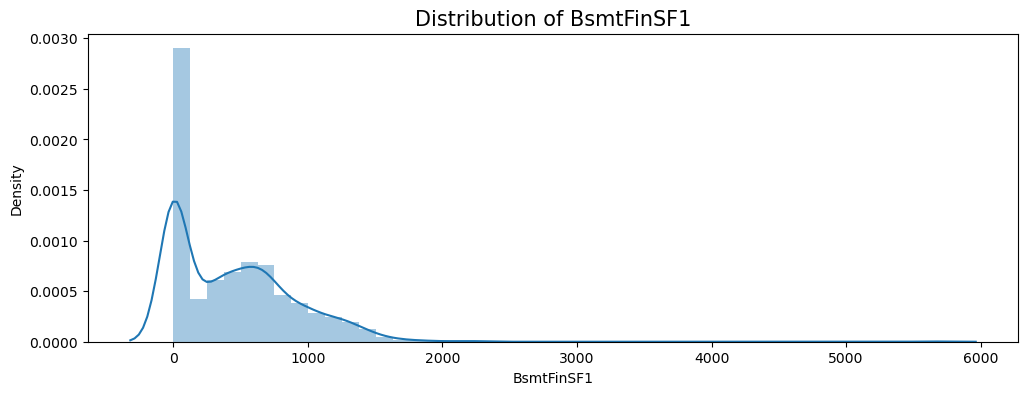

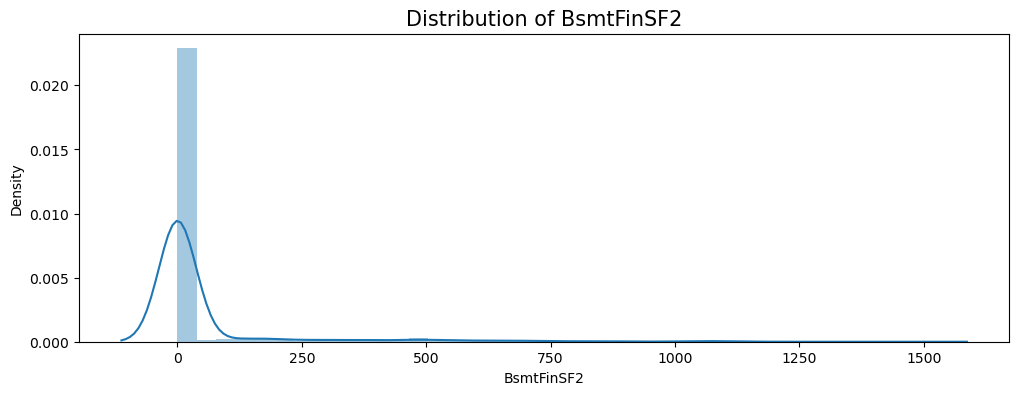

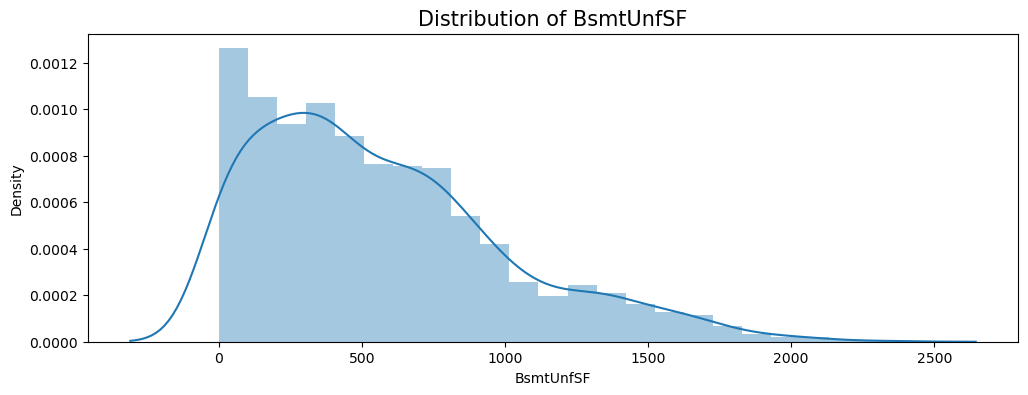

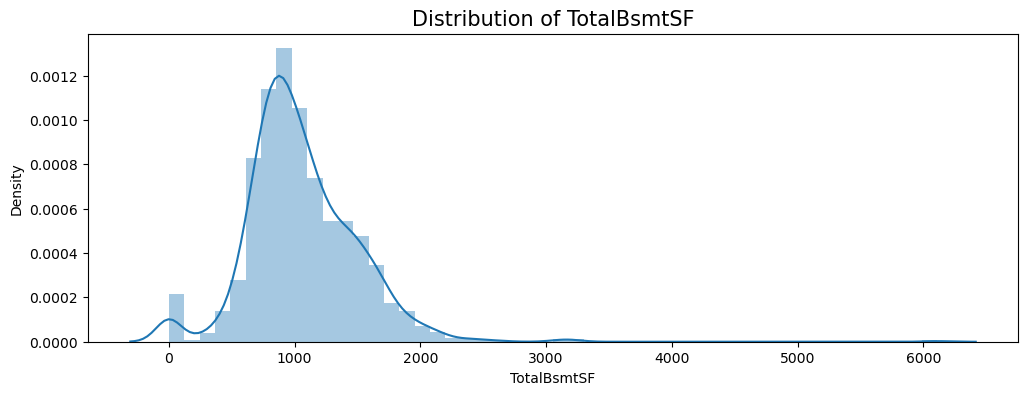

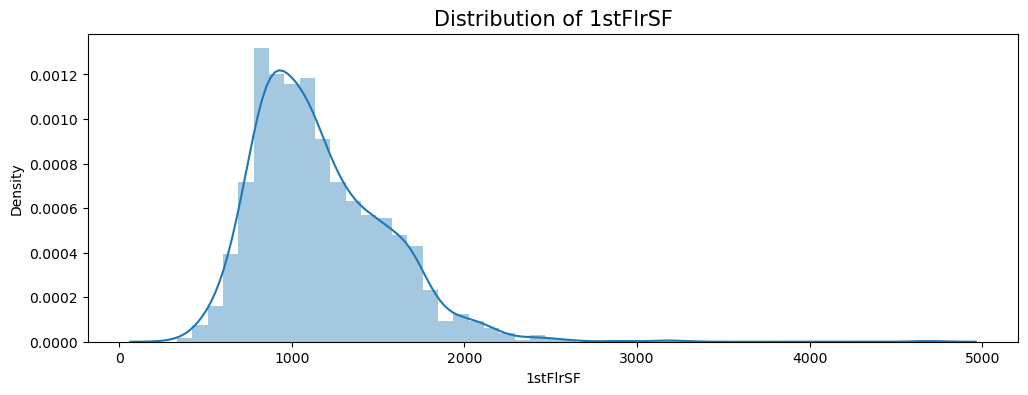

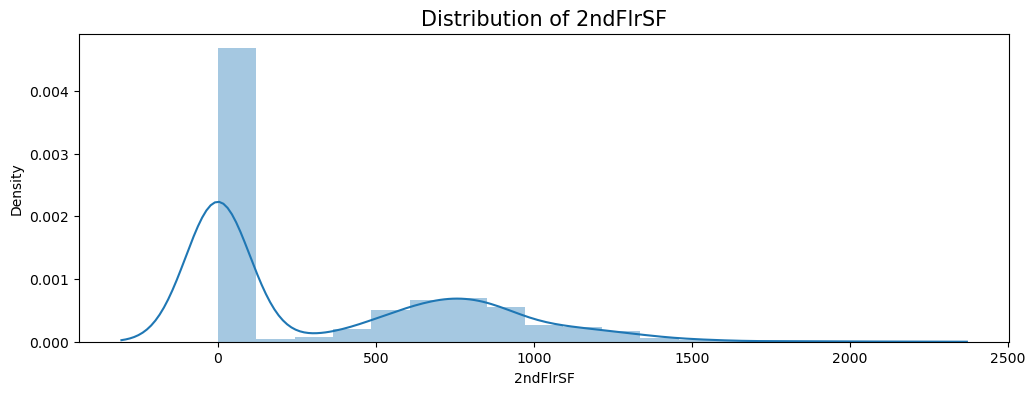

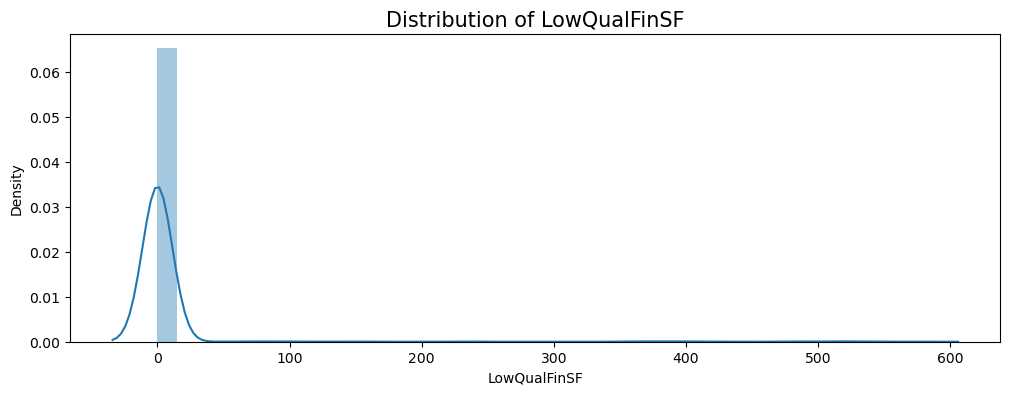

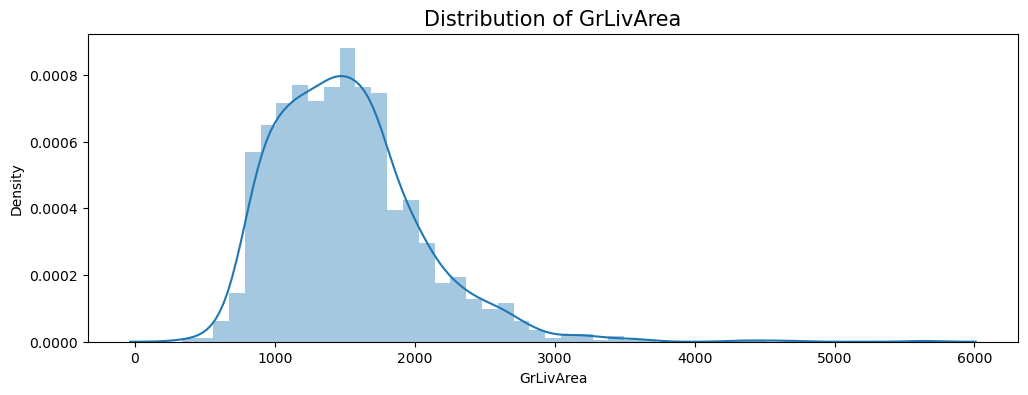

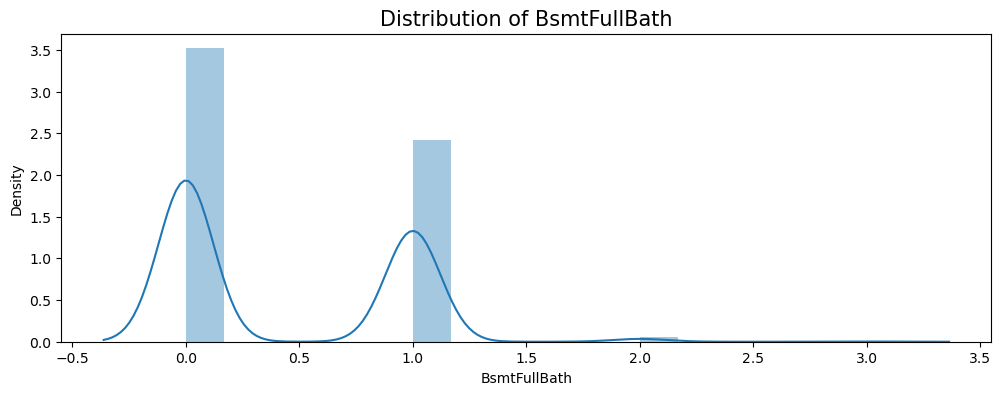

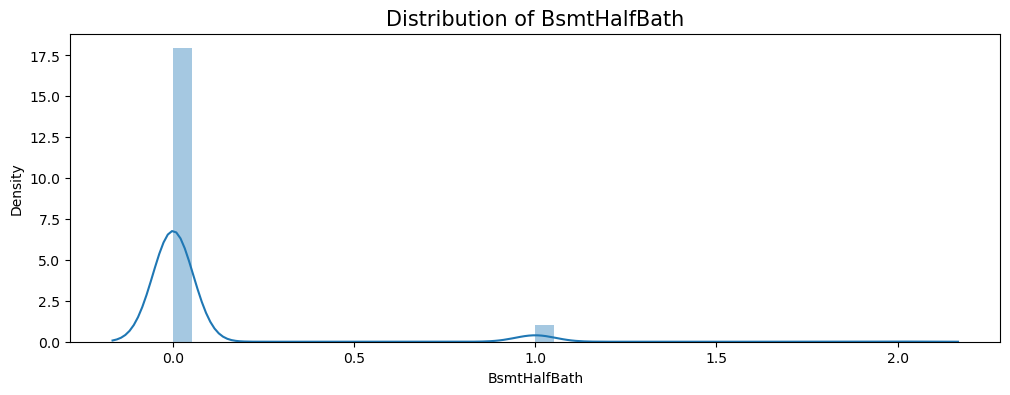

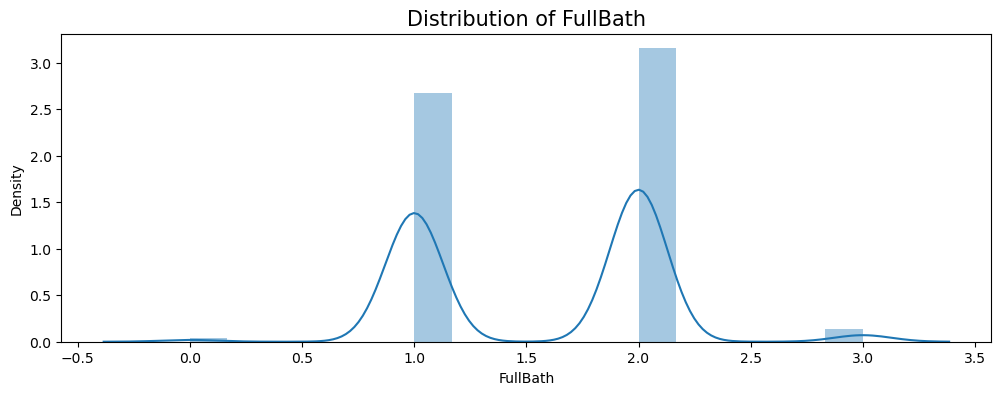

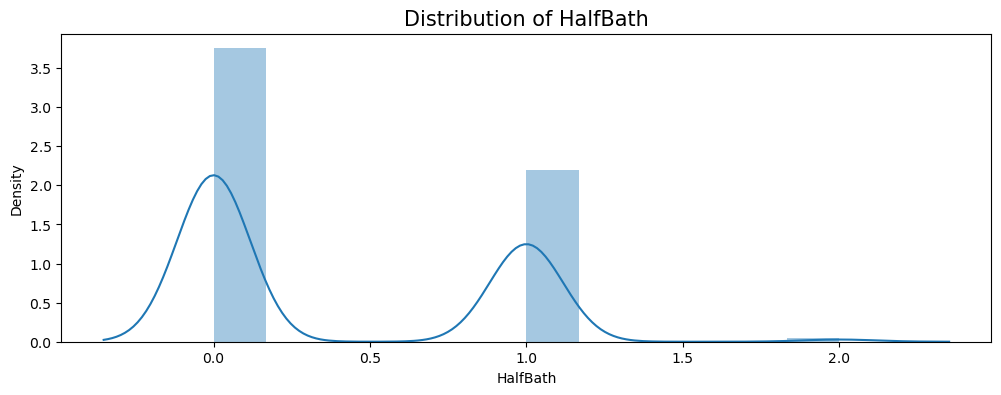

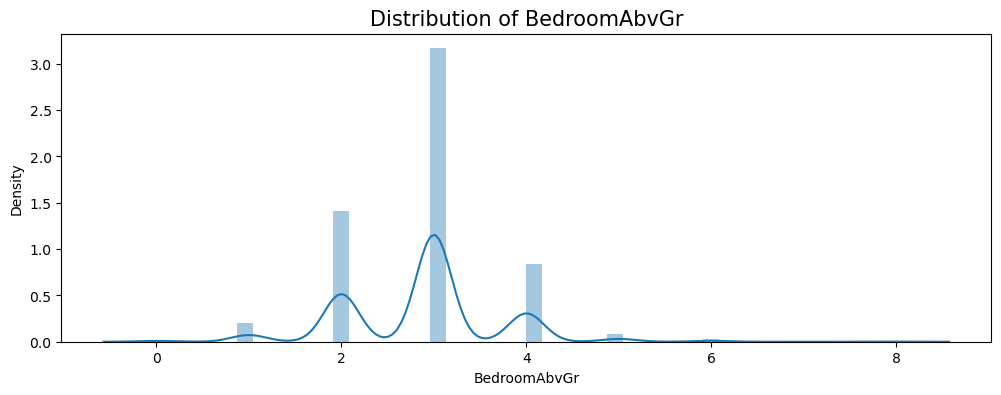

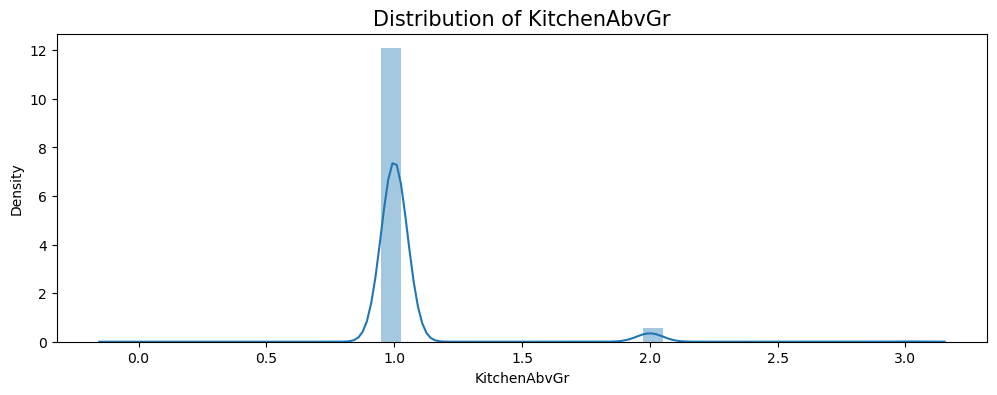

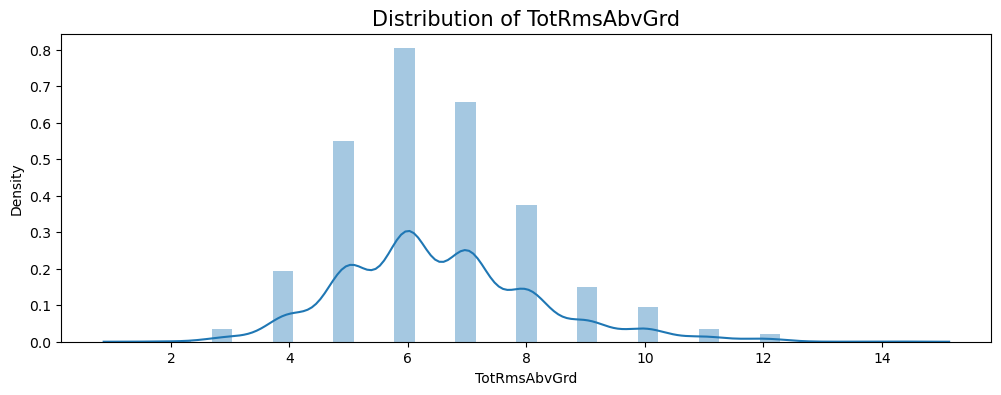

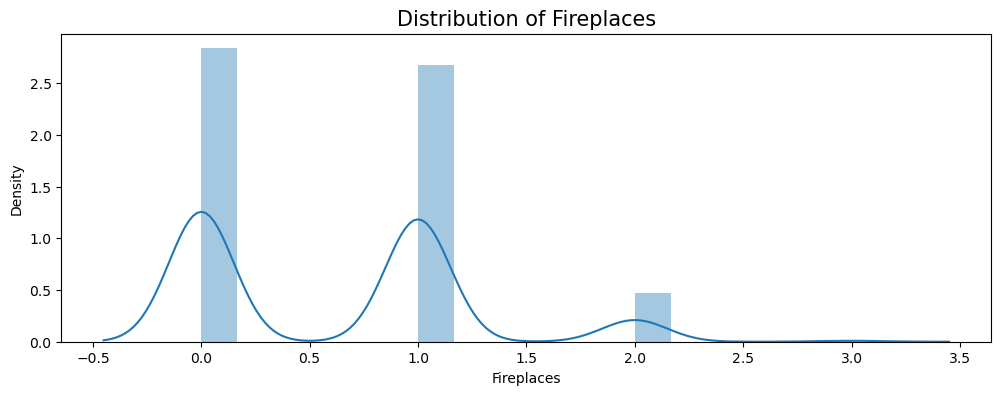

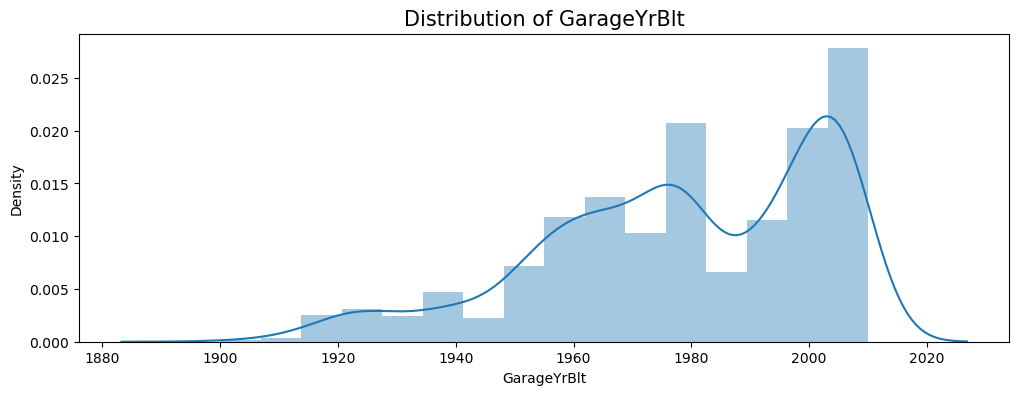

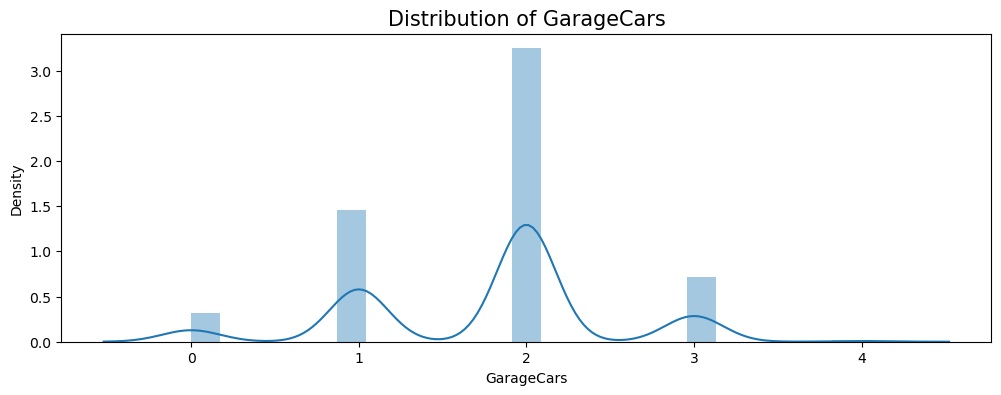

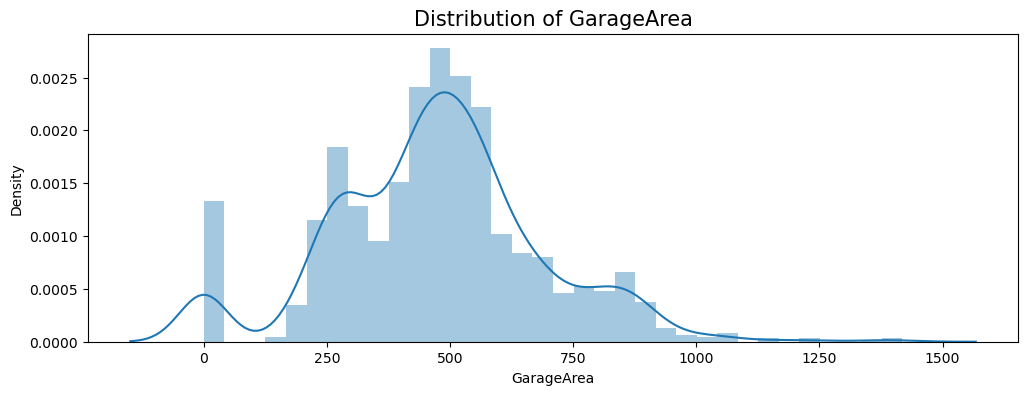

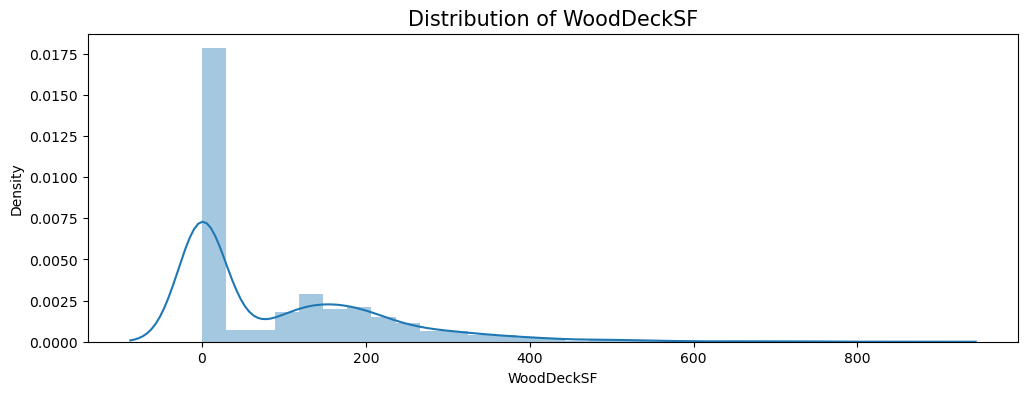

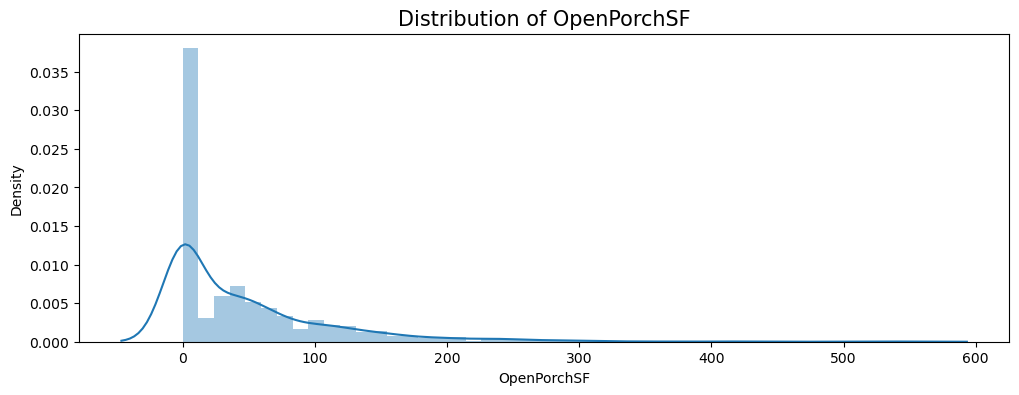

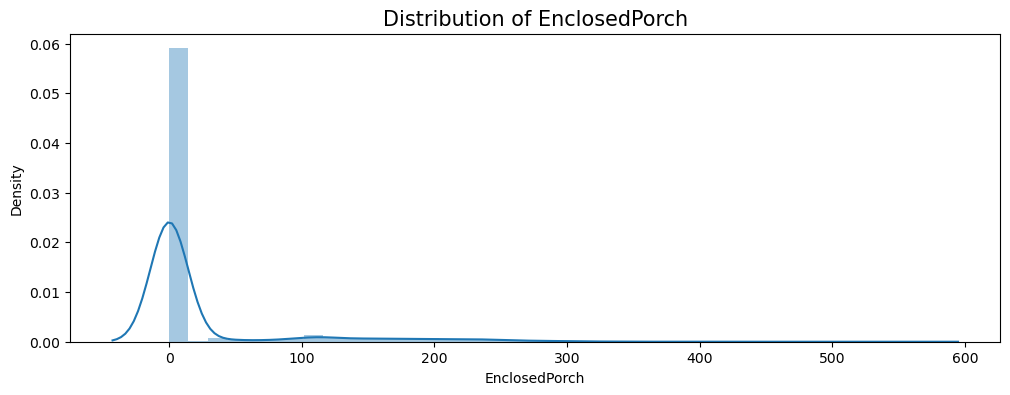

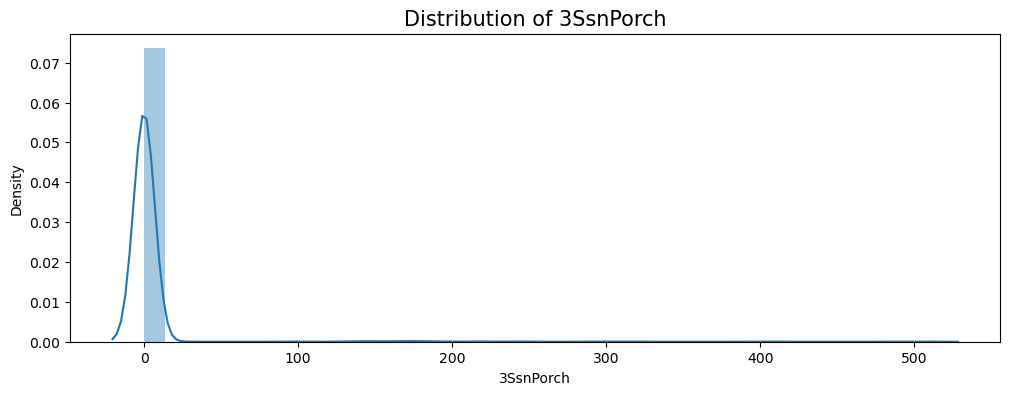

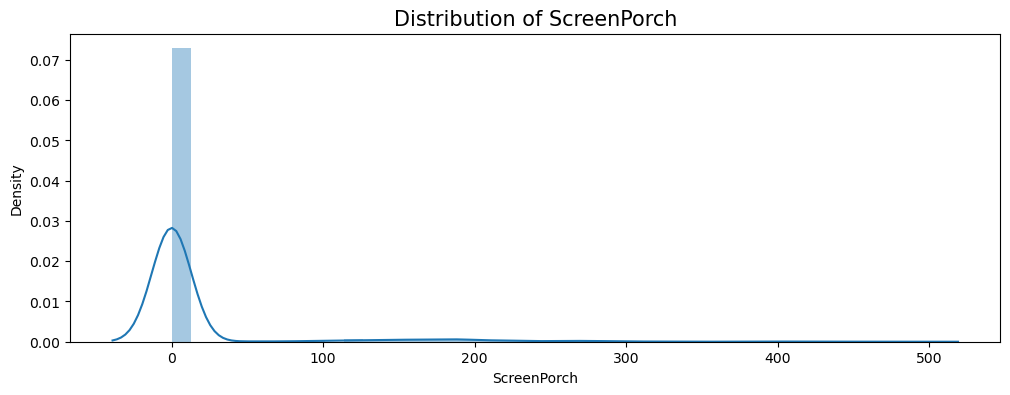

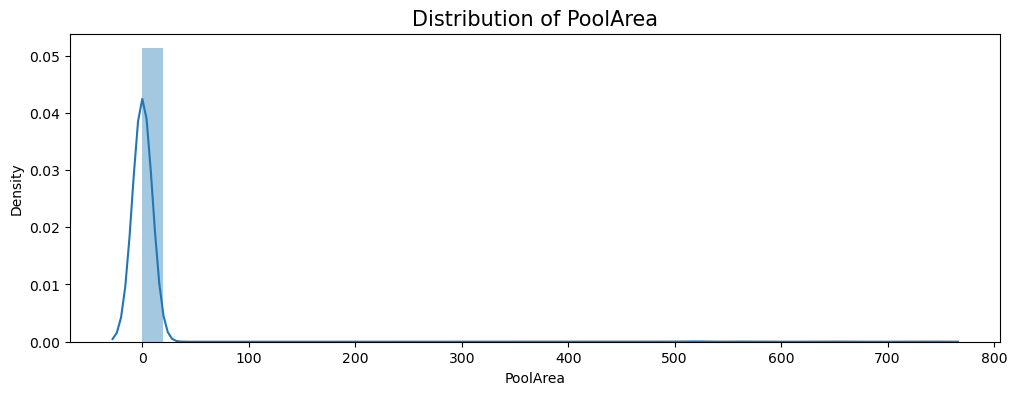

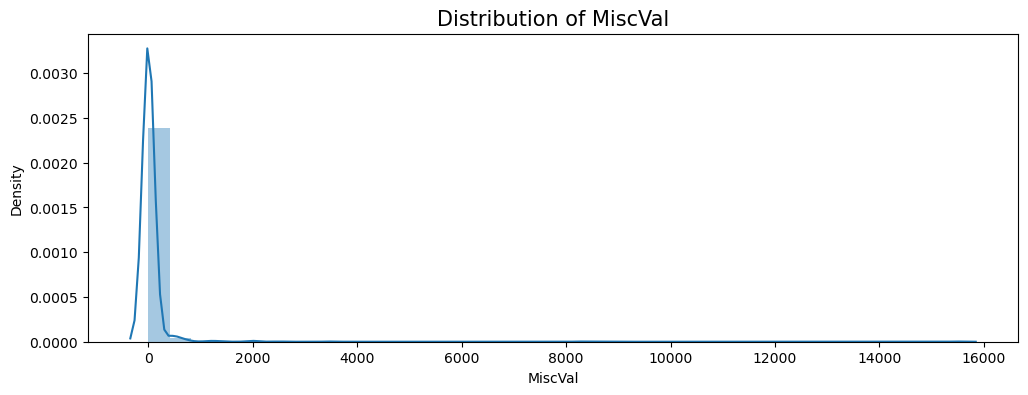

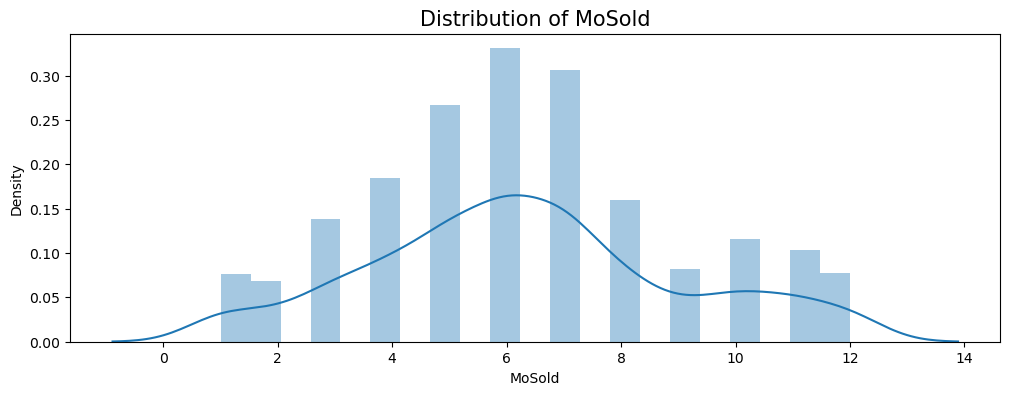

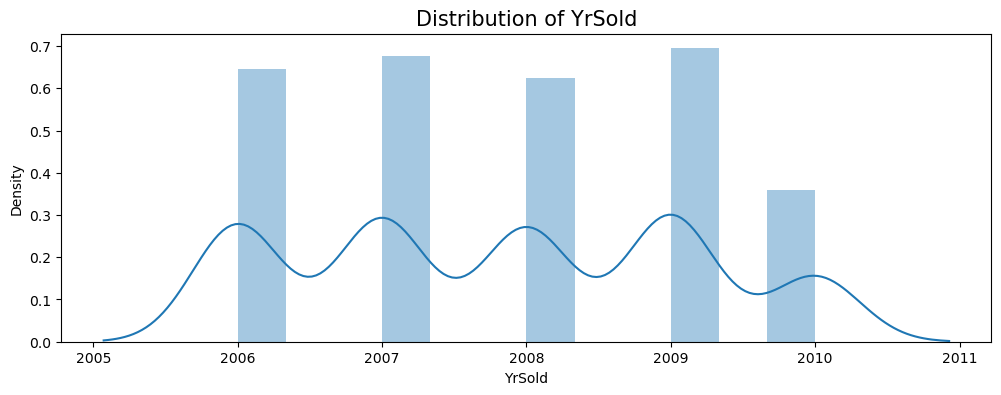

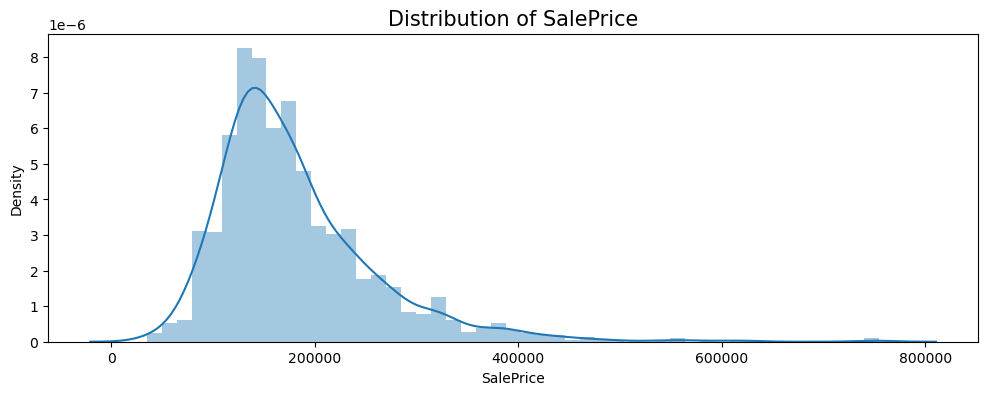

In [209]:
# Visualizing the categorical variables using countplot
for column in df_num_cols:
    plt.figure(figsize=(12,4))
    sns.distplot(surp_housing_df[column])
    plt.title('Distribution of ' + str(column),fontsize=15)
    plt.show()

Observation - SalePrice is right skewed so, we will log transform our target variable.

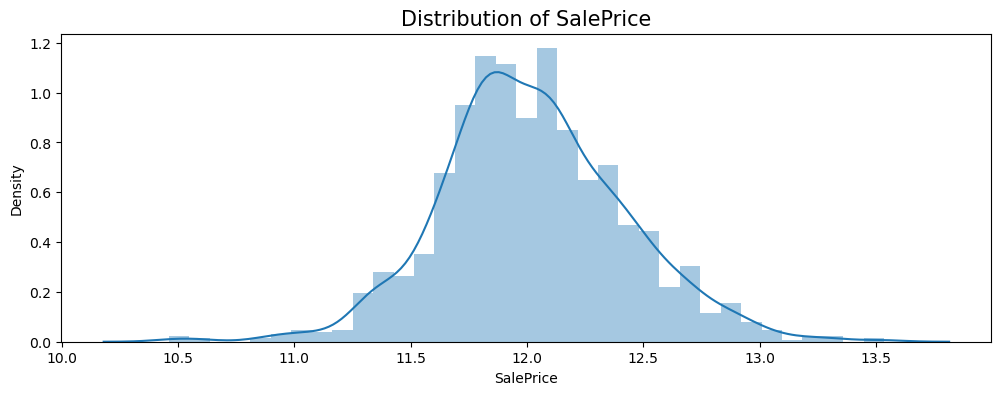

In [210]:
# Log transform the target variable
surp_housing_df['SalePrice'] = np.log(surp_housing_df['SalePrice'])

# Check the skewness of target variable again
plt.figure(figsize=(12,4))
sns.distplot(surp_housing_df['SalePrice'])
plt.title('Distribution of SalePrice',fontsize=15)
plt.show()

Plot heatmap to detect correlations among numerical variables

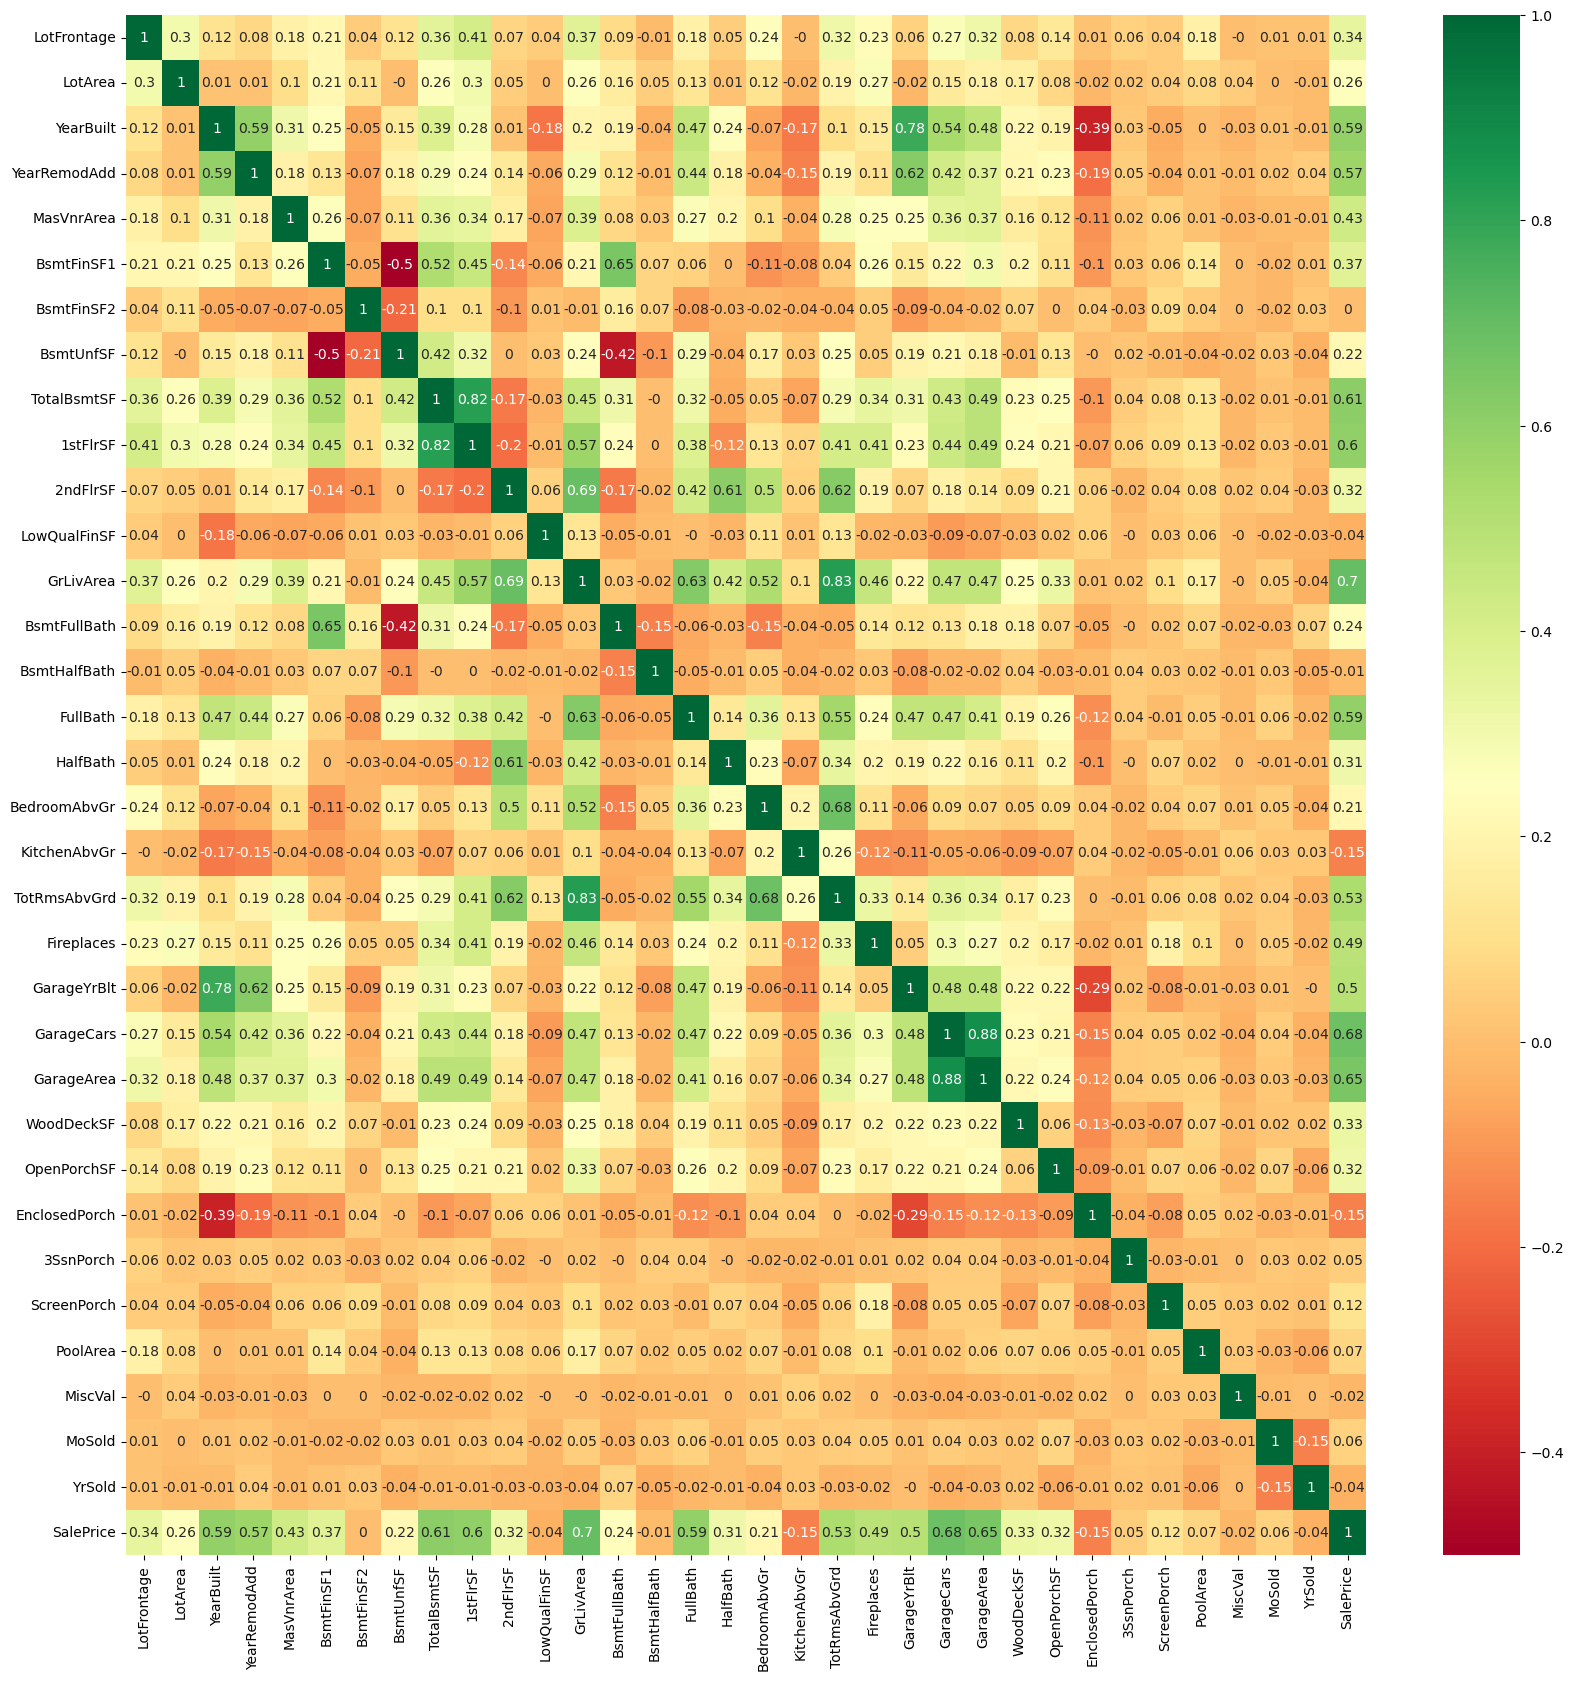

In [211]:
plt.figure(figsize=(20,20))
sns.heatmap(surp_housing_df[df_num_cols].corr().round(2),annot=True,cmap='RdYlGn')
plt.show()

Observations 
- Target variable 'SalePrice' has high correlation with 'GrLivArea', 'GarageCars' and 'GarageArea'.
- 'GarageCars' and 'GarageArea' has high correlation

## Step 2 : Preparing data for modelling

### Driving new feature

In [212]:
# Create new column for the age of the house
surp_housing_df['Age'] = surp_housing_df['YrSold'] - surp_housing_df['YearBuilt']

# Drop the two columns from which we created new one
surp_housing_df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

# Re initializing numeric variable list
df_num_cols = surp_housing_df.select_dtypes(include=['int64', 'float64']).columns

surp_housing_df.shape

(1460, 74)

### Creating dummy variables

In [213]:
# Get the dummy variables for the feature and store it in a new variables
# Also, Let's drop the first column from  new variables using 'drop_first = True'
cat_dummies = pd.get_dummies(surp_housing_df[df_cat_cols], drop_first = True, dtype=int)

# Add the results to the original housing dataframe
surp_housing_df = pd.concat([surp_housing_df,cat_dummies], axis = 1)

# Drop old variables as we have created the new dummies for it
surp_housing_df.drop(df_cat_cols, axis = 1, inplace = True)

#Checking data set shape
print(surp_housing_df.shape)

(1460, 271)


### Separate independent and dependent variables

In [214]:
# Putting feature variable to X
X = surp_housing_df.drop(['SalePrice'], axis=1)
print(X.shape)

# Putting response variable to y
y = surp_housing_df['SalePrice']
print(y.shape)

(1460, 270)
(1460,)


### Splitting Data into Train and Test data set

In [215]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# View dimensions of train data
print(X_train.shape)
print(y_train.shape)

# View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(1021, 270)
(1021,)
(438, 270)
(438,)


### Rescaling the numerical variable

In [216]:
# Creating  numerical columns name list
num_cols = X_train.columns.values

# Create a scaling instance
scaler = MinMaxScaler()

# Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()


,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.202055,0.042534,0.333333,0.208999,0.000000,0.000000,0.558219,0.213421,0.309316,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1452,0.047945,0.011101,0.916667,0.058055,0.096917,0.000000,0.000000,0.089525,0.169344,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
762,0.174658,0.034308,0.983333,0.000000,0.004252,0.000000,0.313356,0.123732,0.098669,0.379177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
932,0.215753,0.048470,0.933333,0.219158,0.000000,0.000000,0.815497,0.311784,0.360486,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
435,0.075342,0.043782,0.766667,0.000000,0.068214,0.305235,0.029966,0.130769,0.113125,0.403874,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Step 3 : Model Building

Defining a functions to calculate metric of the model

In [217]:
def get_model_metric(y_train, y_train_pred, y_test, y_test_pred):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric.append(r2_train_lr)
    print("r2 score (Train) => ", '%.4f' %r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_test_pred)
    metric.append(r2_test_lr)
    print("r2 score (Test) => ", '%.4f' %r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss1_lr)
    print("RSS (Train) => ", '%.4f' %rss1_lr)
    
    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    metric.append(rss2_lr)
    print("RSS (Test) => ", '%.4f' %rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train_lr)
    print("mean squared error (Train) => ", '%.4f' %mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    metric.append(mse_test_lr)
    print("mean squared error (Test) => ", '%.4f' %mse_test_lr)
    
    rmse_train_lr = mse_train_lr**0.5
    metric.append(rmse_train_lr)
    print("root mean squared error (Train) => ", '%.4f' %rmse_train_lr)
    
    rmse_test_lr = mse_test_lr**0.5
    metric.append(rmse_test_lr)
    print("root mean squared error (Test) => ", '%.4f' %rmse_test_lr)
    
    return metric

### Linear Regression

In [218]:
# Instantiate
model_lr = LinearRegression()

# Fit a line
model_lr.fit(X_train,y_train)

# Make predictions
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Check metrics
model_lr_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.9503
r2 score (Test) =>  -1732385166097486336.0000
RSS (Train) =>  7.8808
RSS (Test) =>  128724914877620699136.0000
mean squared error (Train) =>  0.0077
mean squared error (Test) =>  293892499720595200.0000
root mean squared error (Train) =>  0.0879
root mean squared error (Test) =>  542118529.2172


### Ridge Regression

In [219]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

folds = 5

# Instantiate
model_ridge = Ridge()

# cross validation
ridgeCV = GridSearchCV(estimator = model_ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train)

# View the optimal value of alpha
ridgeCV.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 5.0}

In [220]:
# Create a ridge regreesion instance with optimum value alpha
model_ridge = Ridge(alpha=5.0)

# Fit the model on training data
model_ridge.fit(X_train, y_train)

# Make predictions
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

# Check metrics
model_ridge_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.9210
r2 score (Test) =>  0.8851
RSS (Train) =>  12.5130
RSS (Test) =>  8.5382
mean squared error (Train) =>  0.0123
mean squared error (Test) =>  0.0195
root mean squared error (Train) =>  0.1107
root mean squared error (Test) =>  0.1396


### Lasso Regression

In [221]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
folds = 5

# Instantiate
model_lasso = Lasso()

# cross validation
ridgeCV = GridSearchCV(estimator = model_lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train)

# View the optimal value of alpha
ridgeCV.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.001}

In [222]:
# Create a lasso regreesion instance with optimum value alpha
model_lasso = Lasso(alpha=0.001)

# Fit the model on training data
model_lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# Check metrics
model_lasso_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.9003
r2 score (Test) =>  0.8819
RSS (Train) =>  15.7933
RSS (Test) =>  8.7724
mean squared error (Train) =>  0.0155
mean squared error (Test) =>  0.0200
root mean squared error (Train) =>  0.1244
root mean squared error (Test) =>  0.1415


## Step 4 : Model Evaluation

-  Creating a table which contain all the metrics

In [223]:
data = {
    'LinearRegression': model_lr_metric,
    'RidgeRegression': model_ridge_metric,
    'LassoRegression': model_lasso_metric,
}
data_index =['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)']
df = pd.DataFrame(data, index =data_index)
df.index.name = "Metric"
df.head(8)

,LinearRegression,RidgeRegression,LassoRegression
Metric,,,
R2 Score (Train),9.502519e-01,0.921011,0.900304
R2 Score (Test),-1.732385e+18,0.885092,0.881941
RSS (Train),7.880818e+00,12.513036,15.793288
RSS (Test),1.287249e+20,8.538225,8.772354
MSE (Train),7.718725e-03,0.012256,0.015468
MSE (Test),2.938925e+17,0.019494,0.020028
RMSE (Train),8.785627e-02,0.110705,0.124372
RMSE (Test),5.421185e+08,0.139620,0.141521


Obsrvations
-  <b>Linear Regression</b>
    -  In R2_Score value, there is big difference between train and test data set which essentially indicates overfitting.
    -  In RSS value, It is very high in test as compare to train which indicates poorer model fits to data.
<br>
<br>
-  <b>Ridge regression</b>
    -  In R2_Score value, the difference between train and test data set reduce a lot.
    -  In RSS value, It is less in test as compare to train which indicates model fits to data is good.
<br>
<br>
-  <b>Lasso regression</b>
    -  R2_Score, the difference between train and test data set reduce even more as compare to Ridge model.
    -  In RSS value, It is less in test as compare to train which indicates model fits to data is good.

-  Creating a table which contain all the coeficients

In [224]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear Regression'] = model_lr.coef_
betas['Ridge Regression'] = model_ridge.coef_
betas['Lasso Regression'] = model_lasso.coef_
pd.set_option('display.max_rows',None)
betas.head(50)

,Linear Regression,Ridge Regression,Lasso Regression
LotFrontage,9.312562e-02,-0.017338,-0.000000
LotArea,4.294612e-01,0.074715,0.000000
YearRemodAdd,7.018278e-02,0.082115,0.101340
MasVnrArea,5.707196e-02,0.033880,0.000000
BsmtFinSF1,-3.989853e+10,0.034668,0.000000
BsmtFinSF2,-7.966982e+09,0.046421,0.000000
BsmtUnfSF,-1.651364e+10,0.054589,0.000000
TotalBsmtSF,4.319278e+10,0.061457,0.000000
1stFlrSF,1.486763e+10,0.150151,0.000000
2ndFlrSF,7.044897e+09,0.166859,0.000000


Features having zero coeficient in lasso model indicates that model has removed these feature which means that lasso also helps in feature selection.

### Features Selected By Ridge Model

In [225]:
# Top 10 features selected by lasso model
betas.loc[betas['Ridge Regression']!=0, 'Ridge Regression'].round(2).sort_values(ascending = False).head(10)

GrLivArea               0.20
TotRmsAbvGrd            0.19
2ndFlrSF                0.17
GarageCars              0.17
OverallQual_9           0.16
1stFlrSF                0.15
FullBath                0.15
Neighborhood_StoneBr    0.12
OverallQual_8           0.11
BedroomAbvGr            0.11
Name: Ridge Regression, dtype: float64

### Features Selected By Lasso Model

In [226]:
# Top 10 features selected by lasso model
betas.loc[betas['Lasso Regression']!=0, 'Lasso Regression'].round(2).sort_values(ascending = False).head(10)

GrLivArea               0.88
GarageCars              0.29
OverallQual_9           0.21
TotRmsAbvGrd            0.16
FullBath                0.12
OverallQual_8           0.12
YearRemodAdd            0.10
BsmtFullBath            0.10
CentralAir_Y            0.10
Neighborhood_Crawfor    0.10
Name: Lasso Regression, dtype: float64

Because of Feature selection as well we can choose Lasso regression

## Step 6 : Coding Question Answers

##### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge and lasso is 5.0 and 0.001 respectively. If I choose double the value of alpha for both which means 10.0 for ridge and 0.002 for lasso.

In [227]:
# Instantiate ridge model
model_a2_ridge = Ridge(alpha=10.0)

# Fit the model on training data
model_a2_ridge .fit(X_train, y_train)

# Make predictions
y_pred_train = model_a2_ridge .predict(X_train)
y_pred_test = model_a2_ridge .predict(X_test)

# Check metrics
model_a2_ridge_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.9127
r2 score (Test) =>  0.8819
RSS (Train) =>  13.8242
RSS (Test) =>  8.7763
mean squared error (Train) =>  0.0135
mean squared error (Test) =>  0.0200
root mean squared error (Train) =>  0.1164
root mean squared error (Test) =>  0.1416


In [228]:
#Now, Instantiate lasso model
model_a2_lasso = Lasso(alpha=0.002)

# Fit the model on training data
model_a2_lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = model_a2_lasso.predict(X_train)
y_pred_test = model_a2_lasso.predict(X_test)

# Check metrics
model_a2_lasso_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.8771
r2 score (Test) =>  0.8594
RSS (Train) =>  19.4731
RSS (Test) =>  10.4505
mean squared error (Train) =>  0.0191
mean squared error (Test) =>  0.0239
root mean squared error (Train) =>  0.1381
root mean squared error (Test) =>  0.1545


In [229]:
data = {
    'Optimal Ridge Alpha': model_ridge_metric,
    'Double Ridge Alpha': model_a2_ridge_metric,
    'Optimal Lasso Alpha': model_lasso_metric,
    'Double Lasso Alpha': model_a2_lasso_metric
}
data_index =['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)']
df = pd.DataFrame(data, index =data_index)
df.index.name = "Metric"
df.head(8)

,Optimal Ridge Alpha,Double Ridge Alpha,Optimal Lasso Alpha,Double Lasso Alpha
Metric,,,,
R2 Score (Train),0.921011,0.912734,0.900304,0.877075
R2 Score (Test),0.885092,0.881888,0.881941,0.859357
RSS (Train),12.513036,13.824166,15.793288,19.473143
RSS (Test),8.538225,8.776313,8.772354,10.450462
MSE (Train),0.012256,0.013540,0.015468,0.019073
MSE (Test),0.019494,0.020037,0.020028,0.023860
RMSE (Train),0.110705,0.116361,0.124372,0.138104
RMSE (Test),0.139620,0.141553,0.141521,0.154465


For Ridge model, R2 Score of train set decreased from 0.92 to 0.91 and for test set remain same at 0.88. And for Lasso model, R2 Score of train data set decreased from 0.90 to 0.87 and also for decreased for test data set from 0.88 to 0.85. the most important predictor variables after the change is implemented:

In [230]:
betas_a2 = pd.DataFrame(index=X.columns)
betas_a2.rows = X.columns
betas_a2['Ridge Regression'] = model_a2_ridge.coef_
betas_a2['Lasso Regression'] = model_a2_lasso.coef_

Ridge_predictor = betas_a2.loc[betas_a2['Ridge Regression']!=0, 'Ridge Regression'].round(2).sort_values(ascending = False).head(10)
Lasso_predictor = betas_a2.loc[betas_a2['Lasso Regression']!=0, 'Lasso Regression'].round(2).sort_values(ascending = False).head(10)

print('Most important predictor variables after the change for Ridge\n')
print(Ridge_predictor)
print('\n\n')
print('Most important predictor variables after the change for Lasso\n')
print(Lasso_predictor)

Most important predictor variables after the change for Ridge

TotRmsAbvGrd            0.17
GrLivArea               0.16
GarageCars              0.15
2ndFlrSF                0.14
OverallQual_9           0.14
FullBath                0.14
1stFlrSF                0.12
BedroomAbvGr            0.10
GarageArea              0.10
Neighborhood_StoneBr    0.10
Name: Ridge Regression, dtype: float64



Most important predictor variables after the change for Lasso

GrLivArea               0.85
GarageCars              0.33
OverallQual_9           0.21
TotRmsAbvGrd            0.12
OverallQual_8           0.12
YearRemodAdd            0.11
CentralAir_Y            0.11
BsmtExposure_Gd         0.08
Neighborhood_Crawfor    0.07
BsmtFullBath            0.07
Name: Lasso Regression, dtype: float64


#### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Depending upon the number of variables, I will choose the model. If I will require using high numbers of predictor variables then i will go for Lasso because it will also help me to select features. And if I don't want to get too large coefficients and reduction of coefficient magnitude is one of my goals then I will use Ridge.


#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The five most important predictor variables in the lasso model are :  ['GrLivArea','GarageCars','OverallQual_9','TotRmsAbvGrd','FullBath']. Let's drop these variable and buld the lasso model again.

In [231]:
# Create a list of top 5 lasso predictors
top_5_lasso_predictor =  ['GrLivArea','GarageCars','OverallQual_9','TotRmsAbvGrd','FullBath']

# drop them from train and test data
X_train_dropped = X_train.drop(top_5_lasso_predictor, axis=1)
X_test_dropped = X_test.drop(top_5_lasso_predictor, axis=1)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
folds = 5

# Instantiate
model_Q3_lasso = Lasso()

# cross validation
ridgeCV = GridSearchCV(estimator = model_Q3_lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train_dropped, y_train)

# View the optimal value of alpha
ridgeCV.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.0001}

In [232]:
# Create a lasso regreesion instance with optimum value alpha
model_Q3_lasso = Lasso(alpha=0.0001)

# Fit the model on training data
model_Q3_lasso.fit(X_train_dropped, y_train)

# Make predictions
y_pred_train = model_Q3_lasso.predict(X_train_dropped)
y_pred_test = model_Q3_lasso.predict(X_test_dropped)

# Check metrics
model_Q3_lasso_metric = get_model_metric(y_train, y_pred_train, y_test, y_pred_test)

r2 score (Train) =>  0.9370
r2 score (Test) =>  0.8827
RSS (Train) =>  9.9737
RSS (Test) =>  8.7158
mean squared error (Train) =>  0.0098
mean squared error (Test) =>  0.0199
root mean squared error (Train) =>  0.0988
root mean squared error (Test) =>  0.1411


In [233]:
betas_Q3 = pd.DataFrame(index=X_train_dropped.columns)
betas_Q3.rows = X_train_dropped.columns
betas_Q3['Lasso Regression'] = model_Q3_lasso.coef_

betas_Q3.loc[betas_Q3['Lasso Regression']!=0, 'Lasso Regression'].round(2).sort_values(ascending = False).head(5)

RoofMatl_WdShngl    1.18
RoofMatl_CompShg    1.09
RoofMatl_WdShake    1.07
RoofMatl_Roll       1.07
RoofMatl_Tar&Grv    1.06
Name: Lasso Regression, dtype: float64

Now, new predictos will be : ['RoofMatl_WdShngl', 'RoofMatl_CompShg', 'RoofMatl_WdShake', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv']

#### Question 4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

To make model robust and generalisable, we have to ensure that our model is as simple as possible because simpler model can handle a new unfamiliar problem as compare to complex model. Complex model can solve familiar problem fast as compare simpler model because it memorized the data.

Extremely simple models are likely to fail in predicting complex real world phenomena. Simplicity has its own disadvantages.
